Step 1] Install PySpark:

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=1b05fcf49cd9774662c187789dfe2452f43874e8d59adf2dbaf309200999b501
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


Step 2] Initialize SparkSession:

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("EnergyInsights").getOrCreate()

Step 3] Loading and Preparing the Data:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 4] Load Datasets:

In [4]:
daily_df = spark.read.csv("/content/drive/MyDrive/smart_meters_data/daily_dataset.csv", header=True, inferSchema=True)
hourly_df = spark.read.csv("/content/drive/MyDrive/smart_meters_data/weather_hourly_darksky.csv", header=True, inferSchema=True)
households_df = spark.read.csv("/content/drive/MyDrive/smart_meters_data/informations_households.csv", header=True, inferSchema=True)
weather_daily_darksky_df = spark.read.csv("/content/drive/MyDrive/smart_meters_data/weather_daily_darksky.csv", header=True, inferSchema=True)
uk_bank_holidays_df = spark.read.csv("/content/drive/MyDrive/smart_meters_data/uk_bank_holidays.csv", header=True, inferSchema=True)
acorn_details_df = spark.read.csv("/content/drive/MyDrive/smart_meters_data/acorn_details.csv", header=True, inferSchema=True)

Step 5] Structure of the data by printing the schema of each DataFrame and displaying a few sample rows:

In [5]:
# Print the schema of each DataFrame
print("Daily DataFrame Schema:")
daily_df.printSchema()

print("\nHourly DataFrame Schema:")
hourly_df.printSchema()

print("\nHouseholds DataFrame Schema:")
households_df.printSchema()

Daily DataFrame Schema:
root
 |-- LCLid: string (nullable = true)
 |-- day: date (nullable = true)
 |-- energy_median: double (nullable = true)
 |-- energy_mean: double (nullable = true)
 |-- energy_max: double (nullable = true)
 |-- energy_count: integer (nullable = true)
 |-- energy_std: double (nullable = true)
 |-- energy_sum: double (nullable = true)
 |-- energy_min: double (nullable = true)


Hourly DataFrame Schema:
root
 |-- visibility: double (nullable = true)
 |-- windBearing: integer (nullable = true)
 |-- temperature: double (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- dewPoint: double (nullable = true)
 |-- pressure: double (nullable = true)
 |-- apparentTemperature: double (nullable = true)
 |-- windSpeed: double (nullable = true)
 |-- precipType: string (nullable = true)
 |-- icon: string (nullable = true)
 |-- humidity: double (nullable = true)
 |-- summary: string (nullable = true)


Households DataFrame Schema:
root
 |-- LCLid: string (nullable = true

In [6]:
# Display the first 5 rows of each DataFrame
print("\nDaily DataFrame:")
daily_df.show(5, truncate=False)

print("\nHourly DataFrame:")
hourly_df.show(5, truncate=False)

print("\nHouseholds DataFrame:")
households_df.show(5, truncate=False)


Daily DataFrame:
+---------+----------+-------------+-------------------+------------------+------------+-------------------+------------------+-------------------+
|LCLid    |day       |energy_median|energy_mean        |energy_max        |energy_count|energy_std         |energy_sum        |energy_min         |
+---------+----------+-------------+-------------------+------------------+------------+-------------------+------------------+-------------------+
|MAC000131|2011-12-15|0.485        |0.43204545454545457|0.868             |22          |0.23914579678767536|9.505             |0.07200000000000001|
|MAC000131|2011-12-16|0.1415       |0.29616666875000003|1.1160001         |48          |0.2814713178628203 |14.216000100000002|0.031              |
|MAC000131|2011-12-17|0.1015       |0.1898125          |0.685             |48          |0.1884046862418033 |9.111             |0.064              |
|MAC000131|2011-12-18|0.114        |0.2189791666666666 |0.6759999999999999|48          |0.2029

In [7]:
# Print the schema of each DataFrame
print("Weather Daily DataFrame Schema:")
weather_daily_darksky_df.printSchema()

print("\nUK Bank Holidays DataFrame Schema:")
uk_bank_holidays_df.printSchema()

print("\nAcorn Details DataFrame Schema:")
acorn_details_df.printSchema()

Weather Daily DataFrame Schema:
root
 |-- temperatureMax: double (nullable = true)
 |-- temperatureMaxTime: timestamp (nullable = true)
 |-- windBearing: integer (nullable = true)
 |-- icon: string (nullable = true)
 |-- dewPoint: double (nullable = true)
 |-- temperatureMinTime: timestamp (nullable = true)
 |-- cloudCover: double (nullable = true)
 |-- windSpeed: double (nullable = true)
 |-- pressure: double (nullable = true)
 |-- apparentTemperatureMinTime: timestamp (nullable = true)
 |-- apparentTemperatureHigh: double (nullable = true)
 |-- precipType: string (nullable = true)
 |-- visibility: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- apparentTemperatureHighTime: timestamp (nullable = true)
 |-- apparentTemperatureLow: double (nullable = true)
 |-- apparentTemperatureMax: double (nullable = true)
 |-- uvIndex: double (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- sunsetTime: timestamp (nullable = true)
 |-- temperatureLow: double (nullab

In [8]:
# Display the first 5 rows of each DataFrame
print("\nWeather Daily DataFrame:")
weather_daily_darksky_df.show(5, truncate=False)

print("\nUK Bank Holidays DataFrame:")
uk_bank_holidays_df.show(5, truncate=False)

print("\nAcorn Details DataFrame:")
acorn_details_df.show(5, truncate=False)


Weather Daily DataFrame:
+--------------+-------------------+-----------+-------------------+--------+-------------------+----------+---------+--------+--------------------------+-----------------------+----------+----------+--------+---------------------------+----------------------+----------------------+-------+-------------------+-------------------+--------------+--------------+---------------+-------------------+-------------------+-------------------+------------------------------------------------------+-------------------+----------------------+--------------------------+--------------------------+---------+
|temperatureMax|temperatureMaxTime |windBearing|icon               |dewPoint|temperatureMinTime |cloudCover|windSpeed|pressure|apparentTemperatureMinTime|apparentTemperatureHigh|precipType|visibility|humidity|apparentTemperatureHighTime|apparentTemperatureLow|apparentTemperatureMax|uvIndex|time               |sunsetTime         |temperatureLow|temperatureMin|temperatureHi

Step 6] Loading the Big Folder:

In [9]:
import glob

# Define the path to the folders
base_path = "/content/drive/MyDrive/smart_meters_data/"

In [10]:
# Create lists to store the DataFrames
halfhourly_dfs = []
daily_dfs = []
hhblock_dfs = []

In [11]:
# Load the datasets from each folder
for block in range(112):
  halfhourly_path = glob.glob(f"{base_path}halfhourly_dataset/block_{block}.csv")[0]
  daily_path = glob.glob(f"{base_path}daily_dataset/block_{block}.csv")[0]
  hhblock_path = glob.glob(f"{base_path}hhblock_dataset/block_{block}.csv")[0]

  halfhourly_dfs.append(spark.read.csv(halfhourly_path, header=True, inferSchema=True))
  daily_dfs.append(spark.read.csv(daily_path, header=True, inferSchema=True))
  hhblock_dfs.append(spark.read.csv(hhblock_path, header=True, inferSchema=True))

Step 7] Combine the DataFrames for all three folders:

In [13]:
from functools import reduce
from pyspark.sql import DataFrame

# Combine the halfhourly_dfs
halfhourly_df = reduce(DataFrame.unionAll, halfhourly_dfs)

# Combine the daily_dfs (already done in the previous example)
daily_df = reduce(DataFrame.unionAll, daily_dfs)

# Combine the hhblock_dfs
hhblock_df = reduce(DataFrame.unionAll, hhblock_dfs)

Step 8] Visualizing 'hhblock_df':

A] Heatmap:

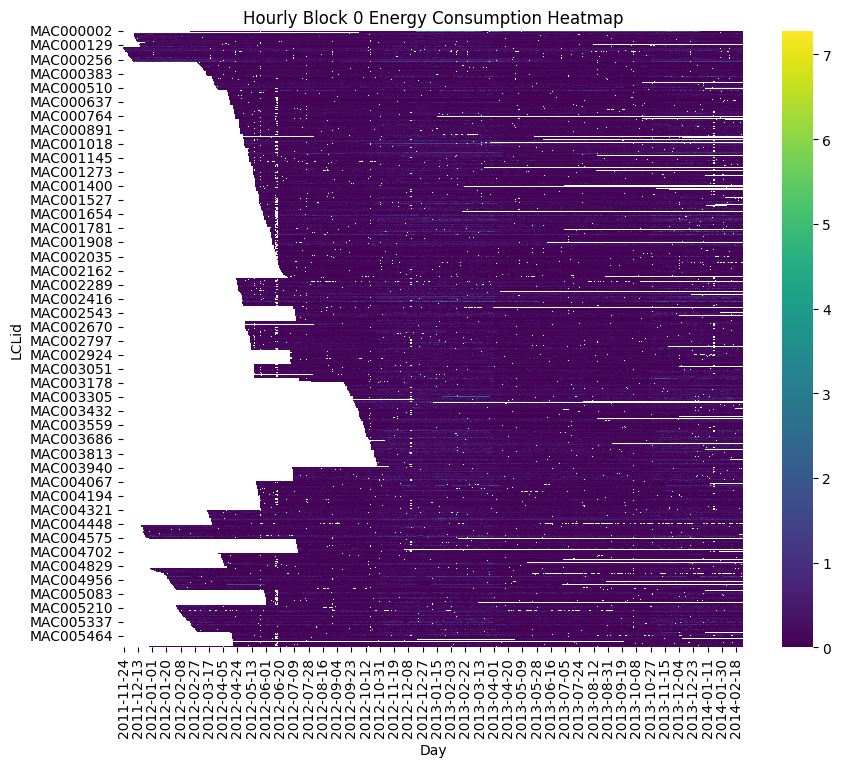

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Convert hhblock_df to Pandas DataFrame (for visualization)
# Reduce the size of the data by only selecting required columns
hhblock_pd = hhblock_df.select(col("LCLid"),col("day"),col("hh_0")).toPandas()

# Create a pivot table for the heatmap
heatmap_data = hhblock_pd.pivot_table(index='LCLid', columns='day', values='hh_0')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Hourly Block 0 Energy Consumption Heatmap')
plt.xlabel('Day')
plt.ylabel('LCLid')
plt.show()

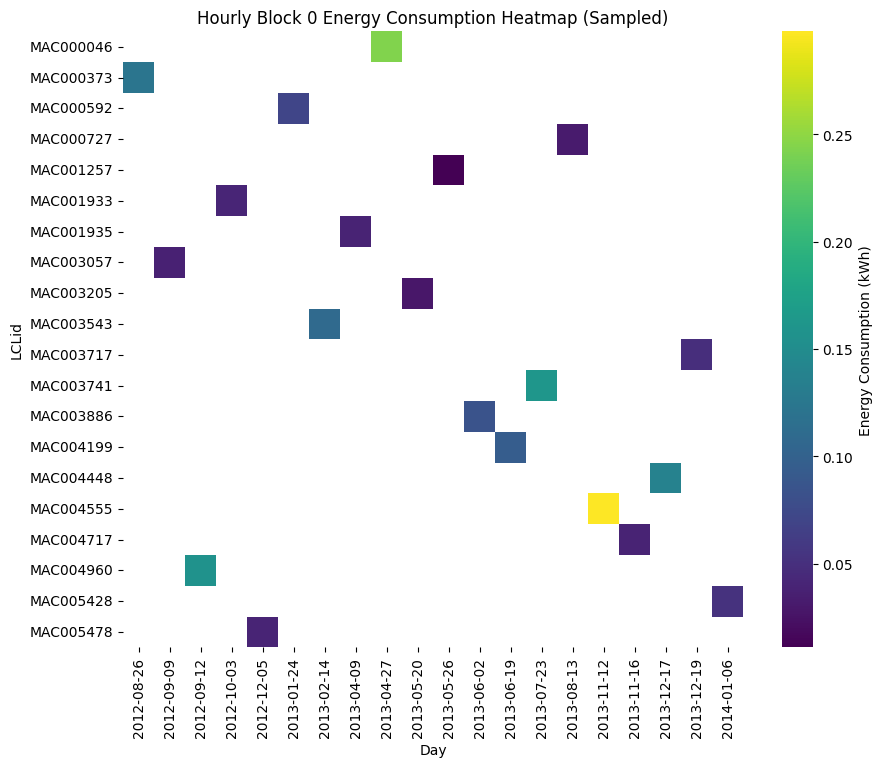

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Convert hhblock_df to Pandas DataFrame (for visualization)
# Reduce the size of the data by only selecting required columns
hhblock_pd = hhblock_df.select(col("LCLid"),col("day"),col("hh_0")).toPandas()

# Sample a subset of the data (e.g., 20 LCLids and 50 days)
hhblock_pd_sampled = hhblock_pd.sample(n=20, replace=False, random_state=42)
heatmap_data = hhblock_pd_sampled.pivot_table(index='LCLid', columns='day', values='hh_0')

# Plot the heatmap with a color bar
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Energy Consumption (kWh)'})
plt.title('Hourly Block 0 Energy Consumption Heatmap (Sampled)')
plt.xlabel('Day')
plt.ylabel('LCLid')

# Show the plot
plt.show()

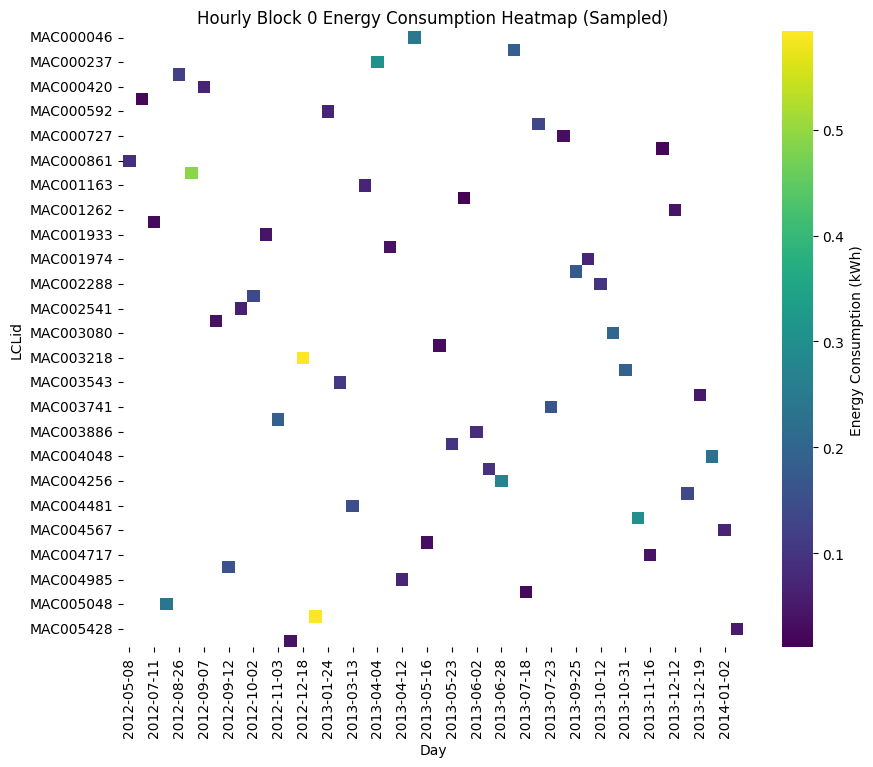

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Convert hhblock_df to Pandas DataFrame (for visualization)
# Reduce the size of the data by only selecting required columns
hhblock_pd = hhblock_df.select(col("LCLid"),col("day"),col("hh_0")).toPandas()

# Sample a subset of the data (e.g., 20 LCLids and 50 days)
hhblock_pd_sampled = hhblock_pd.sample(n=50, replace=False, random_state=42)
heatmap_data = hhblock_pd_sampled.pivot_table(index='LCLid', columns='day', values='hh_0')

# Plot the heatmap with a color bar
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Energy Consumption (kWh)'})
plt.title('Hourly Block 0 Energy Consumption Heatmap (Sampled)')
plt.xlabel('Day')
plt.ylabel('LCLid')

# Show the plot
plt.show()

Interpretation: This heatmap shows the energy consumption patterns for hourly block 0 across different households (LCLid) and days.

Brighter colors indicate higher energy usage. You can observe patterns like:
- Which households consistently use more energy in this hour.
- If there are any days with unusually high or low consumption for many households.

B] Boxplots:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


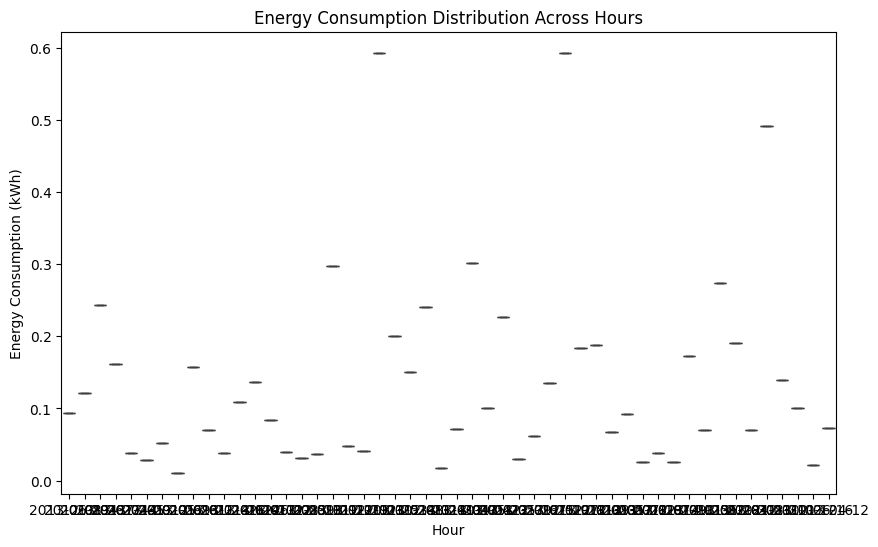

In [25]:
import random

# Sample a subset of days
sampled_days = random.sample(list(hhblock_pd_sampled['day'].unique()), 1)
hhblock_pd_sampled_days = hhblock_pd_sampled[hhblock_pd_sampled['day'].isin(sampled_days)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=hhblock_pd_sampled['day'], y=hhblock_pd_sampled['hh_0'])
plt.title('Energy Consumption Distribution Across Hours')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


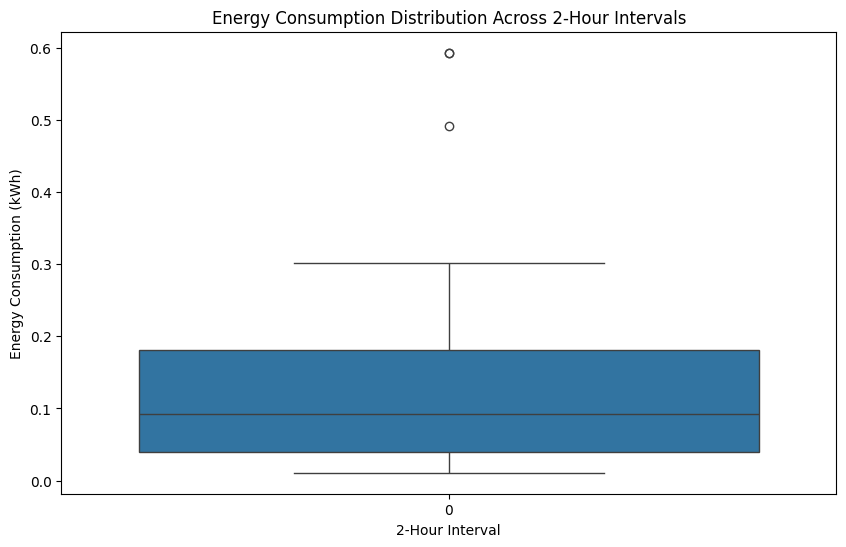

In [26]:
# Create a new column with 2-hour intervals
hhblock_pd_sampled['hour_interval'] = (hhblock_pd_sampled['day'].dt.hour // 2) * 2

plt.figure(figsize=(10, 6))
sns.boxplot(x=hhblock_pd_sampled['hour_interval'], y=hhblock_pd_sampled['hh_0'])
plt.title('Energy Consumption Distribution Across 2-Hour Intervals')
plt.xlabel('2-Hour Interval')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

C] Model 1: K-Means Clustering:

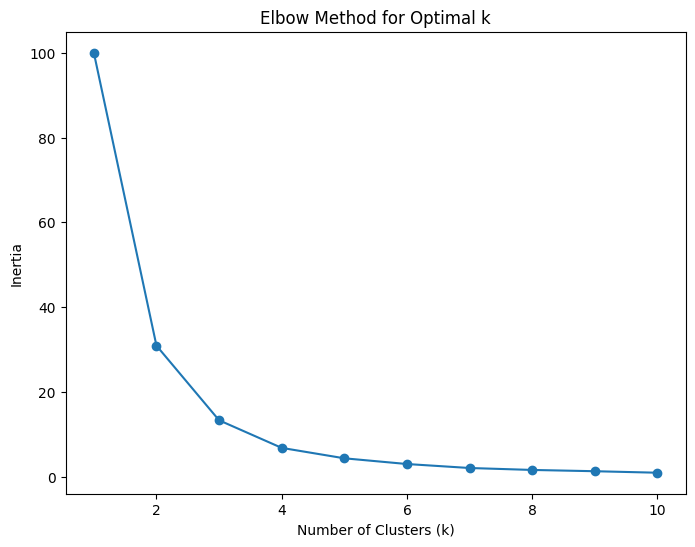

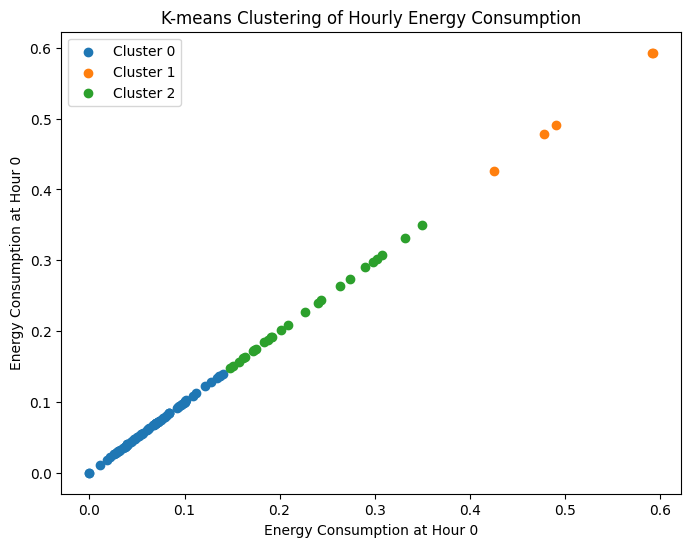

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample a subset of the data (e.g., 100 LCLids)
hhblock_pd_sampled = hhblock_pd.sample(n=100, replace=False, random_state=42)

# Prepare data for clustering
# Select relevant features (e.g., hourly consumption for the first 24 hours)
# X = hhblock_pd_sampled[['hh_' + str(i) for i in range(24)]] # Original code - throws error
X = hhblock_pd_sampled[['hh_0']] # Selecting the only available column

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (using the elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering (using the optimal k)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
hhblock_pd_sampled['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (using a scatter plot)
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = hhblock_pd_sampled[hhblock_pd_sampled['cluster'] == i]
    plt.scatter(cluster_data['hh_0'], cluster_data['hh_0'], label=f'Cluster {i}') # Plotting hh_0 against itself

plt.title('K-means Clustering of Hourly Energy Consumption')
plt.xlabel('Energy Consumption at Hour 0')
plt.ylabel('Energy Consumption at Hour 0')
plt.legend()
plt.show()

D] Daily Average Energy Consumption:

This model calculates and visualizes the average energy consumption for each day of the week.

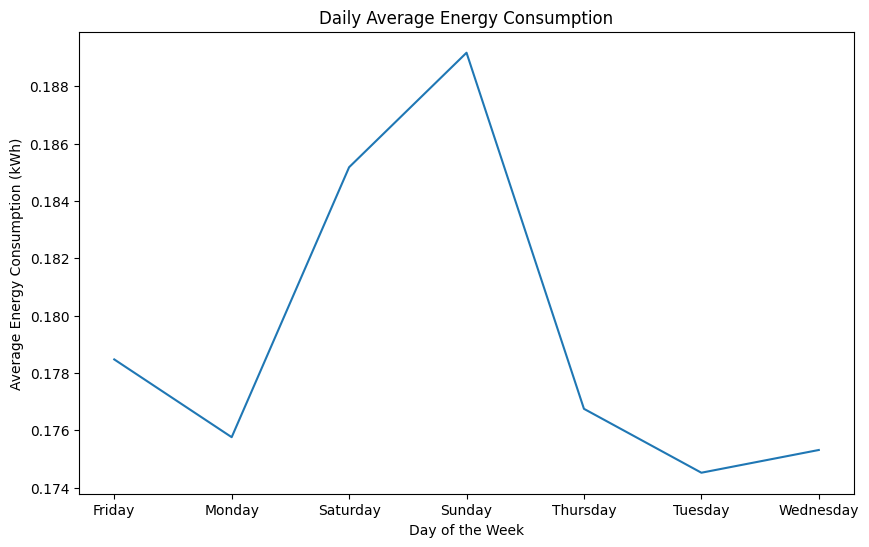

In [40]:
import matplotlib.pyplot as plt

# Calculate daily average energy consumption
hhblock_pd['day_of_week'] = pd.to_datetime(hhblock_pd['day'], format='%d-%m-%Y').dt.day_name()
daily_avg_consumption = hhblock_pd.groupby('day_of_week')['hh_0'].mean()

# Visualize the daily average consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_consumption.index, daily_avg_consumption.values)
plt.title('Daily Average Energy Consumption')
plt.xlabel('Day of the Week')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

E] Hourly Energy Consumption Pattern:

This model visualizes the average hourly energy consumption pattern throughout the day.

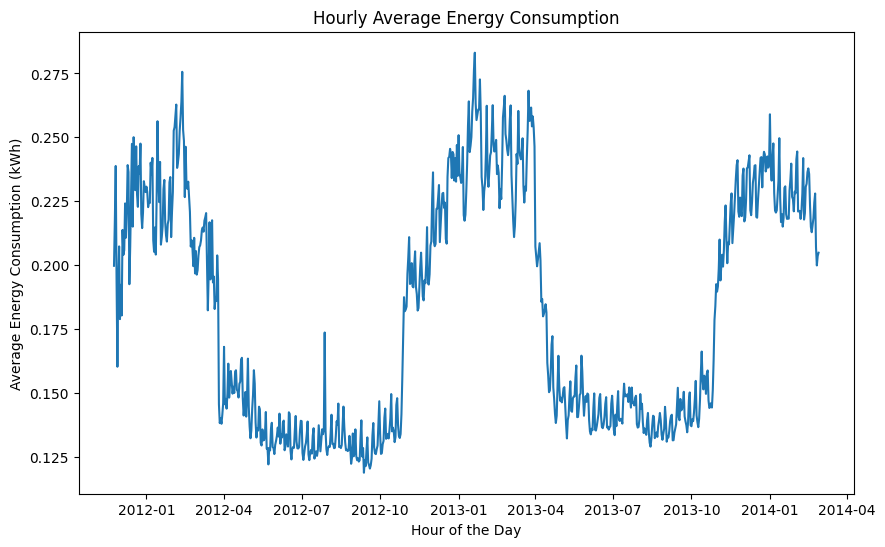

In [41]:
import matplotlib.pyplot as plt

# Calculate hourly average energy consumption
hourly_avg_consumption = hhblock_pd.groupby('day')['hh_0'].mean()

# Visualize the hourly average consumption
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_consumption.index, hourly_avg_consumption.values)
plt.title('Hourly Average Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

F] Correlation between Hourly Consumption and Temperature:

This model analyzes the correlation between hourly energy consumption and temperature.

Correlation between hourly energy consumption and temperature: -0.11544629028043005


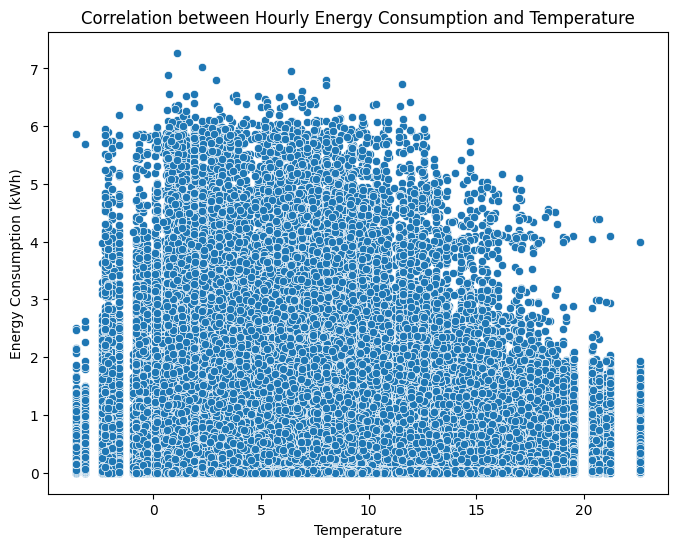

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, hour

# Convert hhblock_df to Pandas DataFrame (for visualization)
hhblock_pd = hhblock_df.select(col("LCLid"), col("day"), col("hh_0")).toPandas()

# Convert 'day' column to datetime in hhblock_pd
hhblock_pd['day'] = pd.to_datetime(hhblock_pd['day'], format='%d-%m-%Y')

# Extract hour from 'time' column and rename it to 'day' in hourly_df
hourly_df = hourly_df.withColumn("hour", hour(col("time")))
hourly_df = hourly_df.withColumn("day", col("time").cast("date"))

# Convert hourly_df to Pandas DataFrame
hourly_pd = hourly_df.select(col("day"), col("hour"), col("temperature")).toPandas()

# Add an 'hour' column to hhblock_pd - this was missing and causing the error!
hhblock_pd['hour'] = hhblock_pd['day'].dt.hour

# Convert 'day' column to datetime in hourly_pd - this is the fix
hourly_pd['day'] = pd.to_datetime(hourly_pd['day'])

# Merge hhblock_pd with hourly_pd on 'day' and 'hour'
merged_df = pd.merge(hhblock_pd, hourly_pd, on=['day', 'hour'])

# Calculate the correlation between 'hh_0' and 'temperature'
correlation = merged_df['hh_0'].corr(merged_df['temperature'])
print(f"Correlation between hourly energy consumption and temperature: {correlation}")

# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='hh_0', data=merged_df)
plt.title('Correlation between Hourly Energy Consumption and Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

Step 9] Visualizing 'halfhourly_df':

In [49]:
# Check the size of halfhourly_df
print("Size of halfhourly_df:", halfhourly_df.count(), "rows x", len(halfhourly_df.columns), "columns")

# Print the schema of halfhourly_df
halfhourly_df.printSchema()

# Try displaying a few rows of halfhourly_df
halfhourly_df.show(20)

# Combine the halfhourly_dfs, optimizing for the 'tstp' column
halfhourly_df = reduce(DataFrame.unionAll, halfhourly_dfs).select("LCLid", "tstp", "energy(kWh/hh)")

Size of halfhourly_df: 167817021 rows x 3 columns
root
 |-- LCLid: string (nullable = true)
 |-- tstp: timestamp (nullable = true)
 |-- energy(kWh/hh): string (nullable = true)

+---------+-------------------+--------------+
|    LCLid|               tstp|energy(kWh/hh)|
+---------+-------------------+--------------+
|MAC000002|2012-10-12 00:30:00|            0 |
|MAC000002|2012-10-12 01:00:00|            0 |
|MAC000002|2012-10-12 01:30:00|            0 |
|MAC000002|2012-10-12 02:00:00|            0 |
|MAC000002|2012-10-12 02:30:00|            0 |
|MAC000002|2012-10-12 03:00:00|            0 |
|MAC000002|2012-10-12 03:30:00|            0 |
|MAC000002|2012-10-12 04:00:00|            0 |
|MAC000002|2012-10-12 04:30:00|            0 |
|MAC000002|2012-10-12 05:00:00|            0 |
|MAC000002|2012-10-12 05:30:00|            0 |
|MAC000002|2012-10-12 06:00:00|            0 |
|MAC000002|2012-10-12 06:30:00|            0 |
|MAC000002|2012-10-12 07:00:00|            0 |
|MAC000002|2012-10-12 0

<ipython-input-80-a40aa0702123>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_household_data['tstp'] = pd.to_datetime(single_household_data['tstp'])


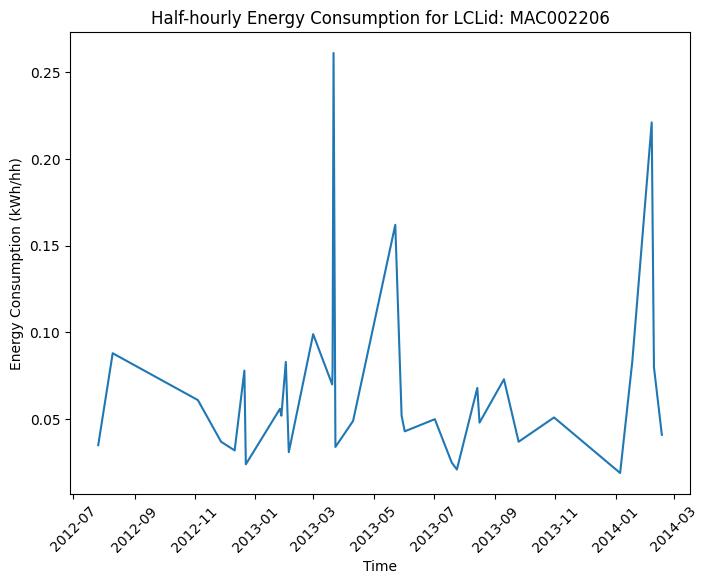

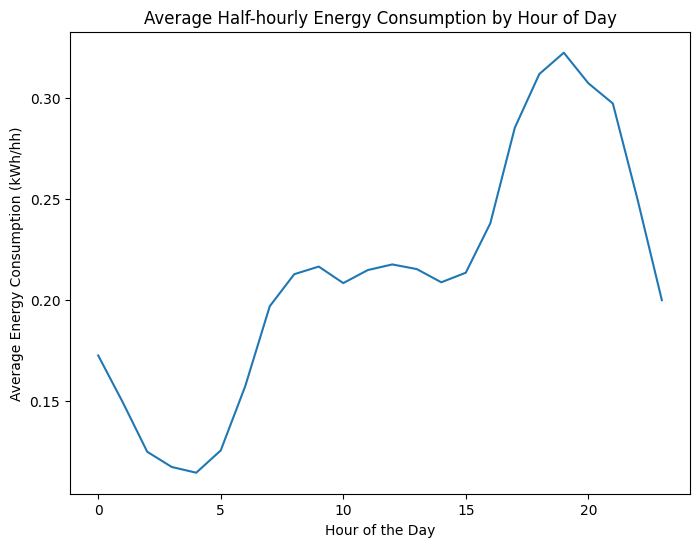

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


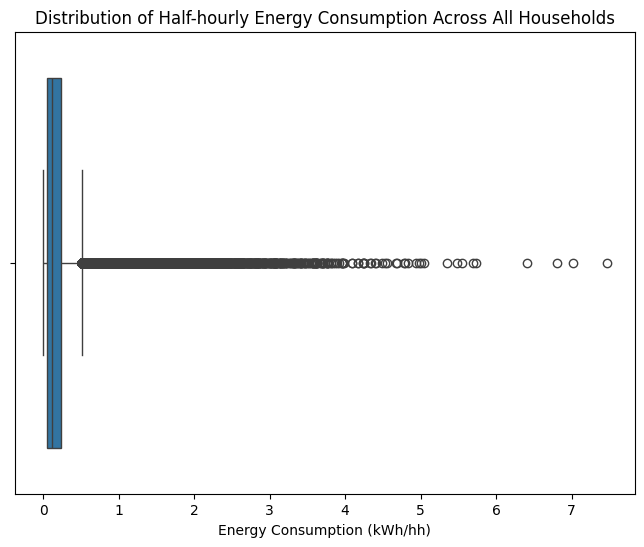

In [80]:
from functools import reduce
from pyspark.sql import DataFrame
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the halfhourly_dfs, optimizing for the 'tstp' column
halfhourly_df = reduce(DataFrame.unionAll, halfhourly_dfs).select("LCLid", "tstp", "energy(kWh/hh)")

# Cast 'energy(kWh/hh)' column to numeric (DoubleType)
halfhourly_df = halfhourly_df.withColumn("energy(kWh/hh)", col("energy(kWh/hh)").cast(DoubleType()))

# Sample a fraction of the data (e.g., 0.1% = 0.001)
sampled_halfhourly_df = halfhourly_df.sample(fraction=0.001, seed=42)

# Convert the sampled DataFrame to Pandas
halfhourly_pd = sampled_halfhourly_df.toPandas()

# --- Model 1: Visualizing Energy Consumption Over Time for a Specific Household ---

# Select a random LCLid
random_lclid = halfhourly_pd['LCLid'].sample(1).values[0]

# Filter data for the selected LCLid
single_household_data = halfhourly_pd[halfhourly_pd['LCLid'] == random_lclid]

# Convert 'tstp' to datetime format (if needed)
single_household_data['tstp'] = pd.to_datetime(single_household_data['tstp'])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(single_household_data['tstp'], single_household_data['energy(kWh/hh)'])
plt.title(f'Half-hourly Energy Consumption for LCLid: {random_lclid}')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh/hh)')
plt.xticks(rotation=45)
plt.show()
print("\n")

# --- Model 2: Average Energy Consumption by Time of Day ---

# Extract hour from 'tstp'
halfhourly_pd['hour'] = pd.to_datetime(halfhourly_pd['tstp']).dt.hour

# Calculate average energy consumption for each hour
hourly_avg_consumption = halfhourly_pd.groupby('hour')['energy(kWh/hh)'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(hourly_avg_consumption.index, hourly_avg_consumption.values)
plt.title('Average Half-hourly Energy Consumption by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption (kWh/hh)')
plt.show()
print("\n")

# --- Model 3: Distribution of Energy Consumption Across Households ---

plt.figure(figsize=(8, 6))
sns.boxplot(x='energy(kWh/hh)', data=halfhourly_pd)
plt.title('Distribution of Half-hourly Energy Consumption Across All Households')
plt.xlabel('Energy Consumption (kWh/hh)')
plt.show()

Step 10] Visualizing 'daily_df':

Mean Squared Error: 0.6919593893957706
R-squared: 0.9919973623482237


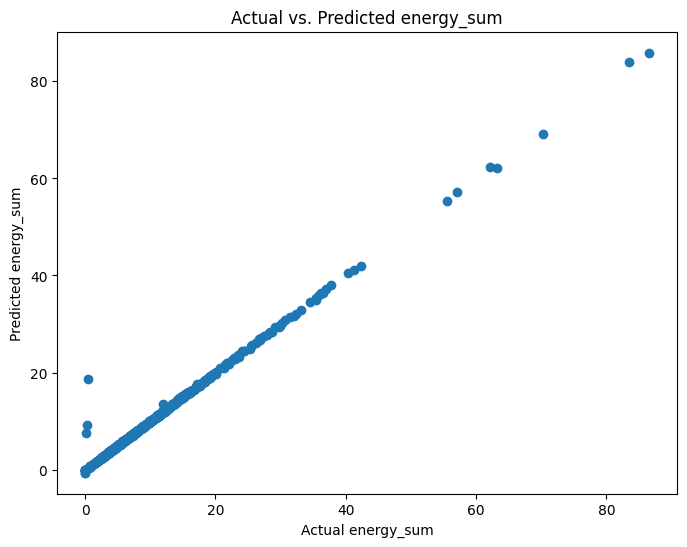

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


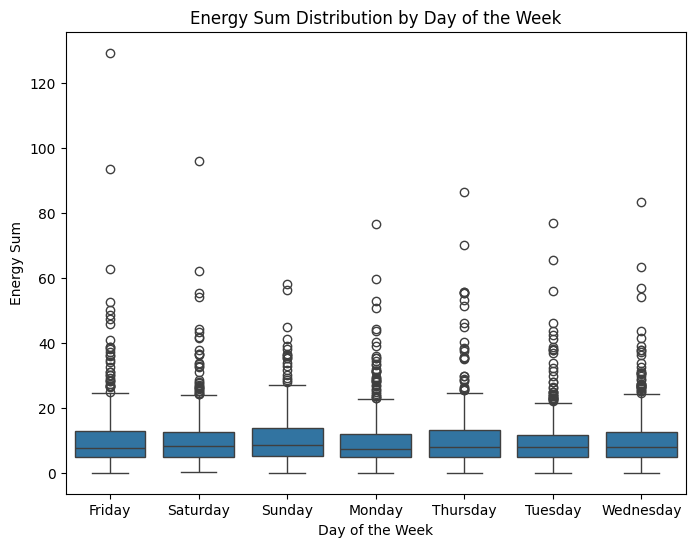

In [56]:
from functools import reduce
from pyspark.sql import DataFrame
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Sample a fraction of the data (e.g., 0.1% = 0.001)
sampled_daily_df = daily_df.sample(fraction=0.001, seed=42)

# Convert the sampled DataFrame to Pandas
daily_pd = sampled_daily_df.toPandas()

# --- Model 1: Predicting energy_sum using Linear Regression ---

# Prepare data for the model
X = daily_pd[['energy_median', 'energy_mean', 'energy_max', 'energy_std']]
y = daily_pd['energy_sum']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer instance with your desired strategy (e.g., mean imputation)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and testing data to replace missing values
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Linear Regression model on the imputed data
model = LinearRegression()
model.fit(X_train_imputed, y_train)  # Use the imputed data here

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)  # Use the imputed data here

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual energy_sum")
plt.ylabel("Predicted energy_sum")
plt.title("Actual vs. Predicted energy_sum")
plt.show()

# --- Model 2: Analyzing energy_sum distribution by day of the week ---

# Convert 'day' to datetime and extract day of the week
daily_pd['day'] = pd.to_datetime(daily_pd['day'], format='%d-%m-%Y')
daily_pd['day_of_week'] = daily_pd['day'].dt.day_name()

# Visualize energy_sum distribution by day of the week
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_week', y='energy_sum', data=daily_pd)
plt.title('Energy Sum Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Sum')
plt.show()

Step 11] Visualizing 'hourly_df':

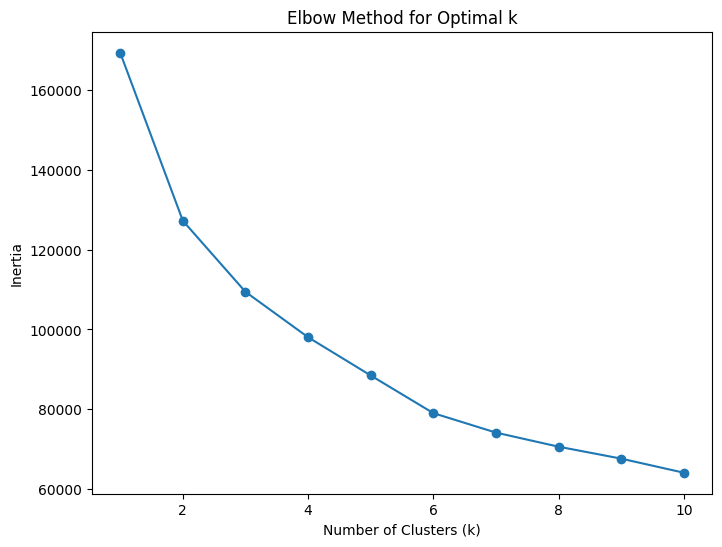

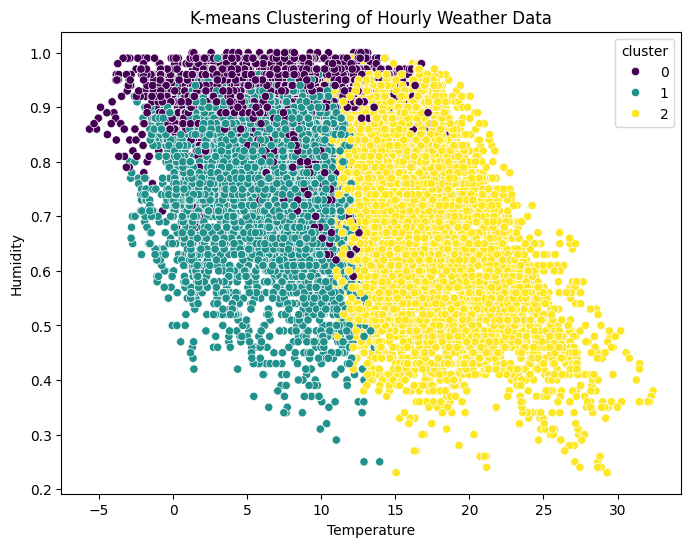

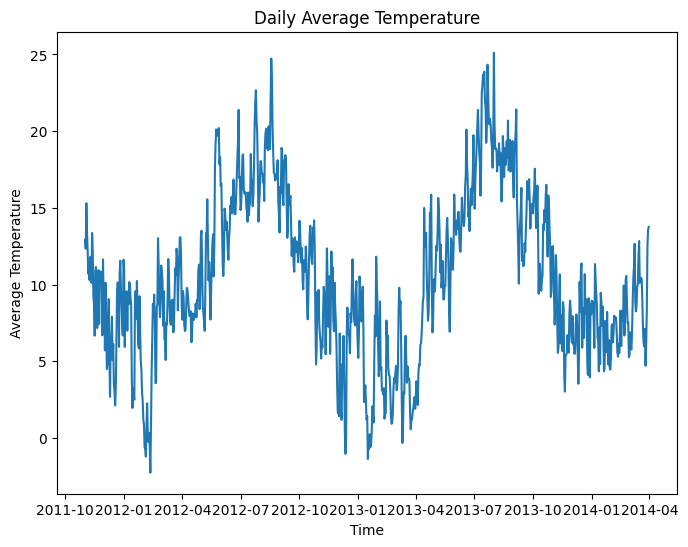

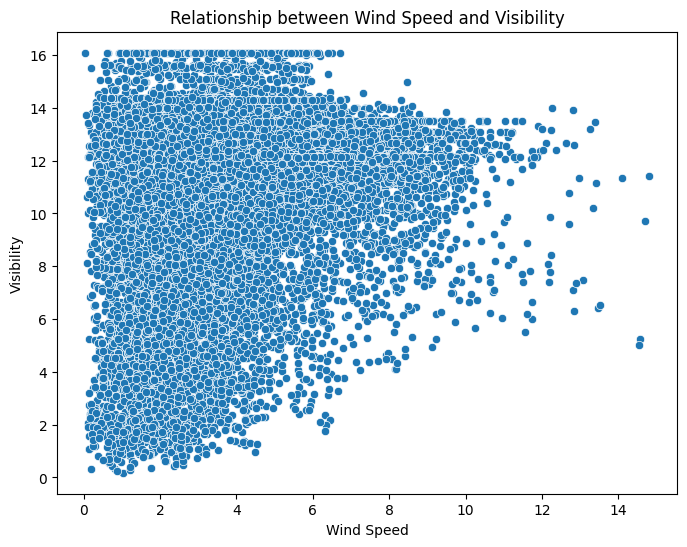

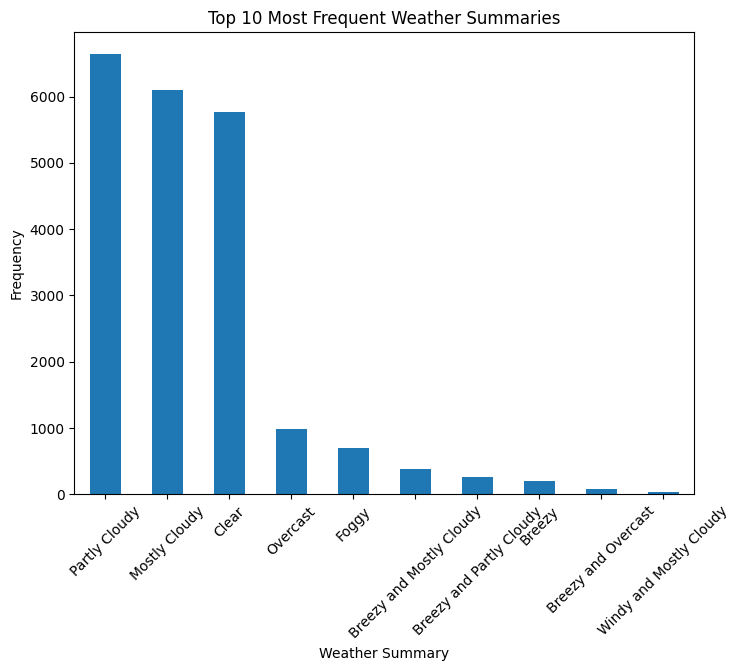

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Convert hourly_df to Pandas DataFrame for visualization and modeling
hourly_pd = hourly_df.toPandas()

# --- Model 1: Clustering based on weather features ---

# Prepare data for clustering
features = ['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure',
            'apparentTemperature', 'windSpeed', 'humidity']
X = hourly_pd[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
X_scaled_imputed = imputer.fit_transform(X_scaled)  # Impute missing values in the scaled features

# Determine the optimal number of clusters (using the elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled_imputed)  # Use the imputed data here
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
print("\n")

# Apply K-means clustering (using the optimal k)
optimal_k = 3  # Example: based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
hourly_pd['cluster'] = kmeans.fit_predict(X_scaled_imputed)  # Use the imputed data here

# Visualize the clusters (using a scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='humidity', hue='cluster', data=hourly_pd, palette='viridis')
plt.title('K-means Clustering of Hourly Weather Data')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()
print("\n")

# --- Model 2: Time series analysis of temperature ---

# Convert 'time' to datetime format
hourly_pd['time'] = pd.to_datetime(hourly_pd['time'])

# Set 'time' as the index
hourly_pd = hourly_pd.set_index('time')

# Resample the data to daily frequency and calculate the mean temperature
daily_avg_temp = hourly_pd['temperature'].resample('D').mean()

# Plot the daily average temperature
plt.figure(figsize=(8, 6))
plt.plot(daily_avg_temp.index, daily_avg_temp.values)
plt.title('Daily Average Temperature')
plt.xlabel('Time')
plt.ylabel('Average Temperature')
plt.show()
print("\n")

# --- Model 3: Analyzing the relationship between wind speed and visibility ---

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windSpeed', y='visibility', data=hourly_pd)
plt.title('Relationship between Wind Speed and Visibility')
plt.xlabel('Wind Speed')
plt.ylabel('Visibility')
plt.show()
print("\n")

# --- Model 4: Exploring the frequency of different weather summaries ---

# Count the occurrences of different weather summaries
summary_counts = hourly_pd['summary'].value_counts()

# Plot the top N most frequent weather summaries
top_n = 10
plt.figure(figsize=(8, 6))
summary_counts[:top_n].plot(kind='bar')
plt.title(f'Top {top_n} Most Frequent Weather Summaries')
plt.xlabel('Weather Summary')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

CNN and LSTM:

Epoch 1/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: nan
Epoch 2/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: nan
Epoch 3/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan
Epoch 4/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan
Epoch 5/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan
Epoch 6/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan
Epoch 7/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan
Epoch 8/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan
Epoch 9/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan
Epoch 10/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
CNN Mean Squared Error: 145.27396671391446


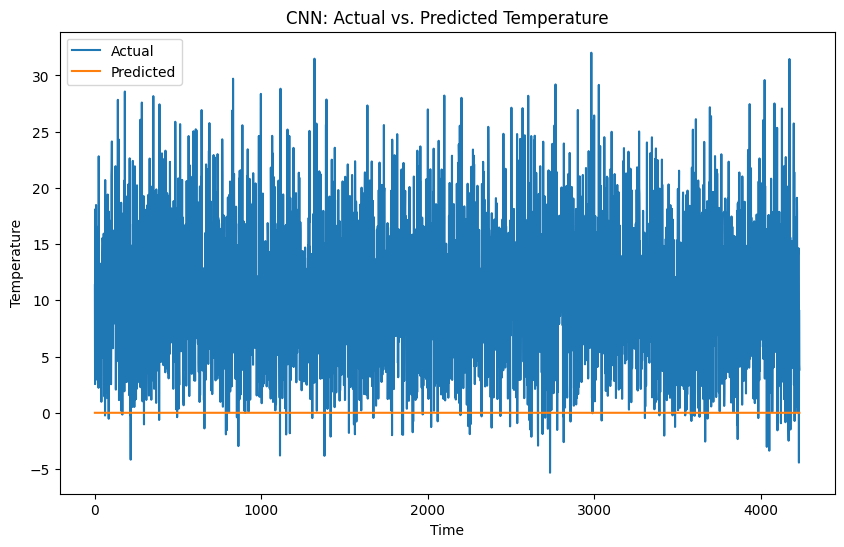

Epoch 1/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan
Epoch 2/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan
Epoch 3/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan
Epoch 4/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: nan
Epoch 5/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan
Epoch 6/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: nan
Epoch 7/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan
Epoch 8/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan
Epoch 9/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan
Epoch 10/10
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM Mean Squared Error: 145.27396671391446


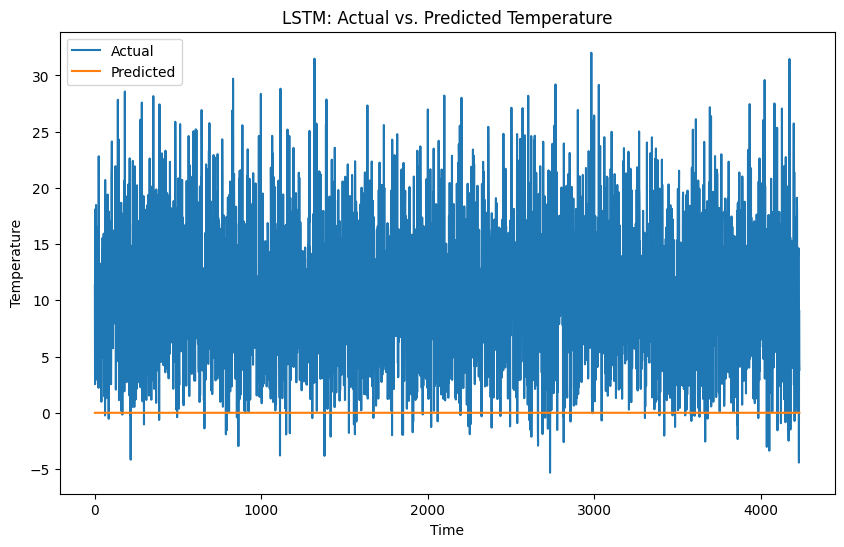

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Input, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Convert hourly_df to Pandas DataFrame for visualization and modeling
hourly_pd = hourly_df.toPandas()

# Prepare data for the models
features = ['visibility', 'windBearing', 'temperature', 'dewPoint', 'pressure',
            'apparentTemperature', 'windSpeed', 'humidity']
X = hourly_pd[features]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# --- Model 1: CNN for feature extraction and temperature prediction ---

# Reshape data for CNN (samples, time steps, features)
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
y_cnn = hourly_pd['temperature']

# Split data into training and testing sets
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y_cnn, test_size=0.2, random_state=42
)

# Create the CNN model
model_cnn = Sequential()

# Use Input layer as the first layer
model_cnn.add(Input(shape=(X_cnn.shape[1], 1)))

model_cnn.add(
    Conv1D(
        filters=64, kernel_size=3, activation="relu"
    )
)

# Add a Flatten layer to convert the output to 2D
model_cnn.add(Flatten())

model_cnn.add(Dense(1))
model_cnn.compile(optimizer="adam", loss="mse")

# Train the CNN model
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred_cnn = model_cnn.predict(X_test_cnn)

# Check for NaN values in y_pred_cnn and replace them with a suitable value (e.g., 0)
y_pred_cnn = np.nan_to_num(y_pred_cnn)

# Evaluate the model
mse_cnn = mean_squared_error(y_test_cnn, y_pred_cnn)
print(f"CNN Mean Squared Error: {mse_cnn}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test_cnn.values, label="Actual")

# Plot predicted values
plt.plot(y_pred_cnn, label="Predicted")

plt.title("CNN: Actual vs. Predicted Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# --- Model 2: LSTM for temperature forecasting ---

# Reshape data for LSTM (samples, time steps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
y_lstm = hourly_pd["temperature"]

# Split data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42
)

# Create the LSTM model
model_lstm = Sequential()
model_lstm.add(Input(shape=(1, X_lstm.shape[2])))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss="mse")

# Train the LSTM model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Check for NaN values in y_pred_lstm and replace them with a suitable value (e.g., 0)
y_pred_lstm = np.nan_to_num(y_pred_lstm)

# Reshape y_pred_lstm to 1D array
y_pred_lstm = y_pred_lstm.flatten()

# Evaluate the model
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
print(f"LSTM Mean Squared Error: {mse_lstm}")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm.values, label="Actual")
plt.plot(y_pred_lstm, label="Predicted")
plt.title("LSTM: Actual vs. Predicted Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

*   Both models have similar accuracy in predicting temperature.
*   The models' error in predicting temperature is about 12 degrees on average (if the temperature is measured in Celsius).


Step 12] Visualizing 'households_df':

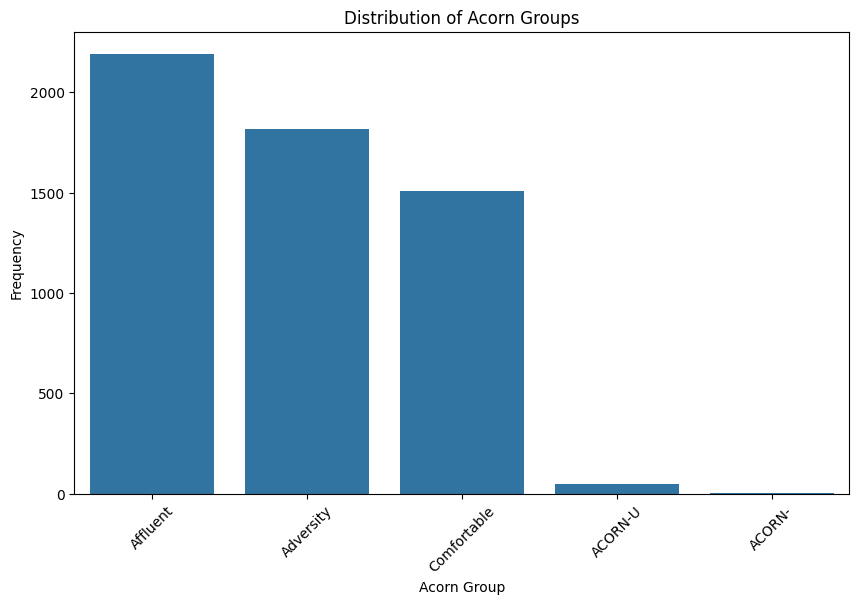

<Figure size 1000x600 with 0 Axes>

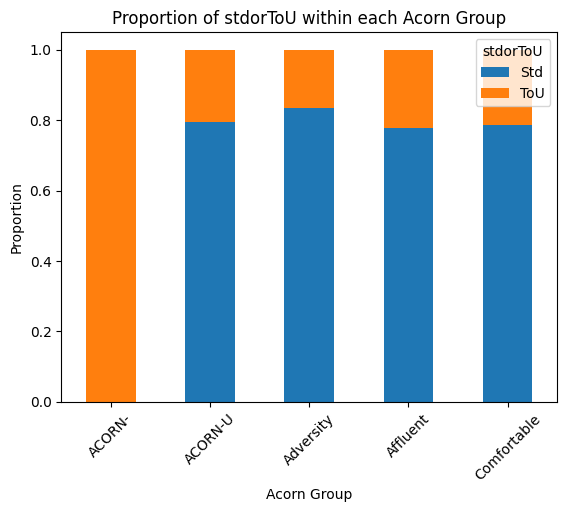

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert households_df to Pandas DataFrame for visualization and modeling
households_pd = households_df.toPandas()

# --- Visualization 1: Distribution of Acorn Groups ---

# Plot the frequency of each Acorn group
plt.figure(figsize=(10, 6))
sns.countplot(x='Acorn_grouped', data=households_pd, order=households_pd['Acorn_grouped'].value_counts().index)
plt.title('Distribution of Acorn Groups')
plt.xlabel('Acorn Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
print("\n")

# --- Visualization 2: Proportion of stdorToU within each Acorn Group ---

# Create a cross-tabulation of Acorn_grouped and stdorToU
cross_tab = pd.crosstab(households_pd['Acorn_grouped'], households_pd['stdorToU'], normalize='index')

# Plot the proportions
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Proportion of stdorToU within each Acorn Group')
plt.xlabel('Acorn Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='stdorToU')
plt.show()

Visualization 1: Distribution of Acorn Groups:

- Plots a bar chart showing the frequency of each Acorn group in the dataset, providing an overview of the representation of different Acorn groups.

Visualization 2: Proportion of stdorToU within each Acorn Group:

- Creates a cross-tabulation between Acorn_grouped and stdorToU to analyze the proportion of each stdorToU category within each Acorn group.
- Plots a stacked bar chart to visualize these proportions, showing the distribution of stdorToU across different Acorn groups.

Analyzing Household Characteristics

This model focuses on exploring the relationships between different household characteristics in the dataset.

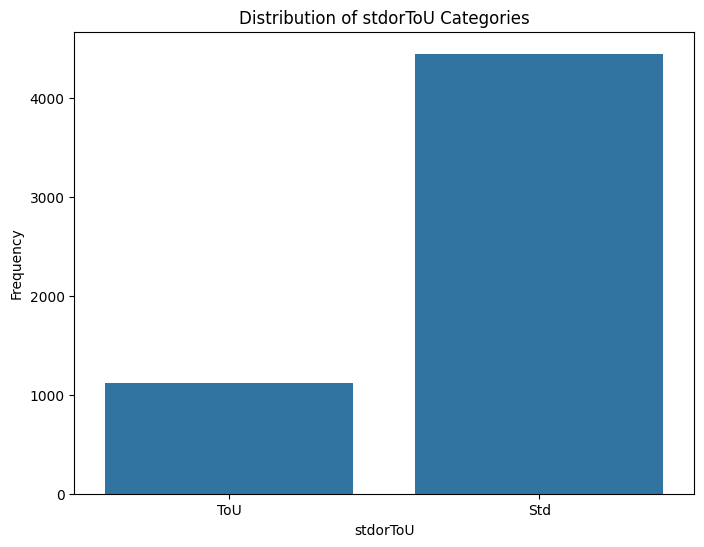

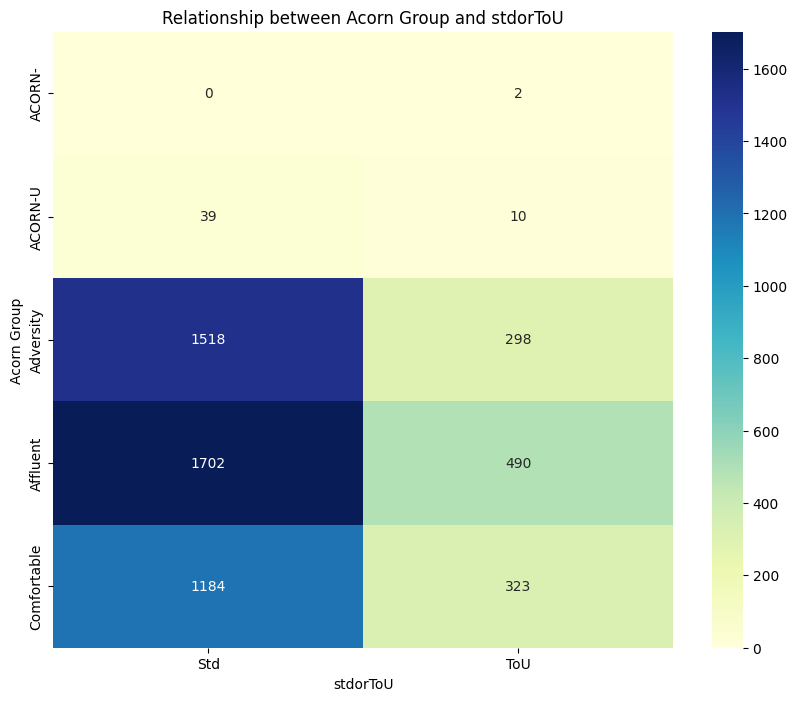

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert households_df to Pandas DataFrame for visualization and modeling
households_pd = households_df.toPandas()

# --- Visualization 1: Distribution of stdorToU categories ---

# Plot the frequency of each stdorToU category
plt.figure(figsize=(8, 6))
sns.countplot(x='stdorToU', data=households_pd)
plt.title('Distribution of stdorToU Categories')
plt.xlabel('stdorToU')
plt.ylabel('Frequency')
plt.show()
print("\n")
# --- Visualization 2: Relationship between Acorn Group and stdorToU ---

# Create a cross-tabulation of Acorn_grouped and stdorToU
cross_tab = pd.crosstab(households_pd['Acorn_grouped'], households_pd['stdorToU'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Relationship between Acorn Group and stdorToU')
plt.xlabel('stdorToU')
plt.ylabel('Acorn Group')
plt.show()

Visualization 1: Distribution of stdorToU categories:

- Plots a bar chart showing the frequency of each stdorToU category in the dataset, providing an overview of their distribution.

Visualization 2: Relationship between Acorn Group and stdorToU:

- Creates a cross-tabulation between Acorn_grouped and stdorToU to analyze the relationship between these two categorical variables.

- Plots a heatmap to visualize the cross-tabulation, showing the frequency of each combination of Acorn group and stdorToU category.

Step 13] Visualizing 'weather_daily_darksky_df':

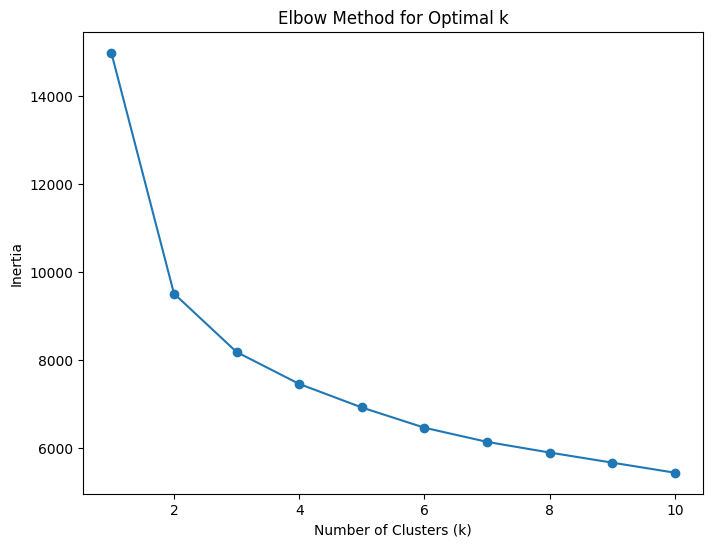

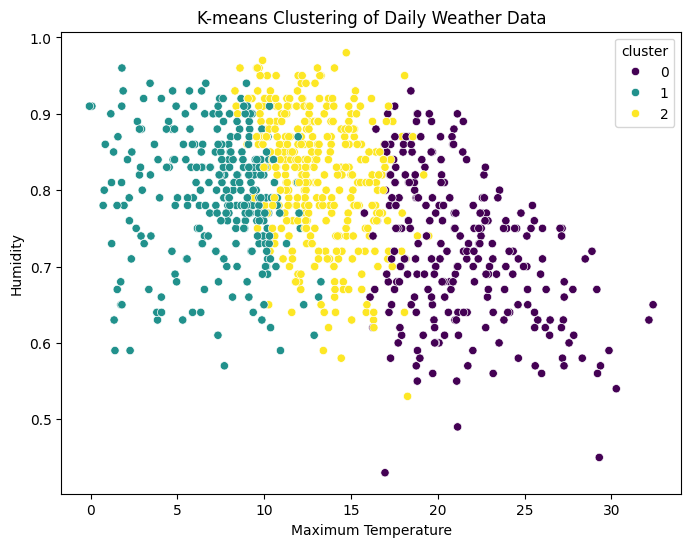

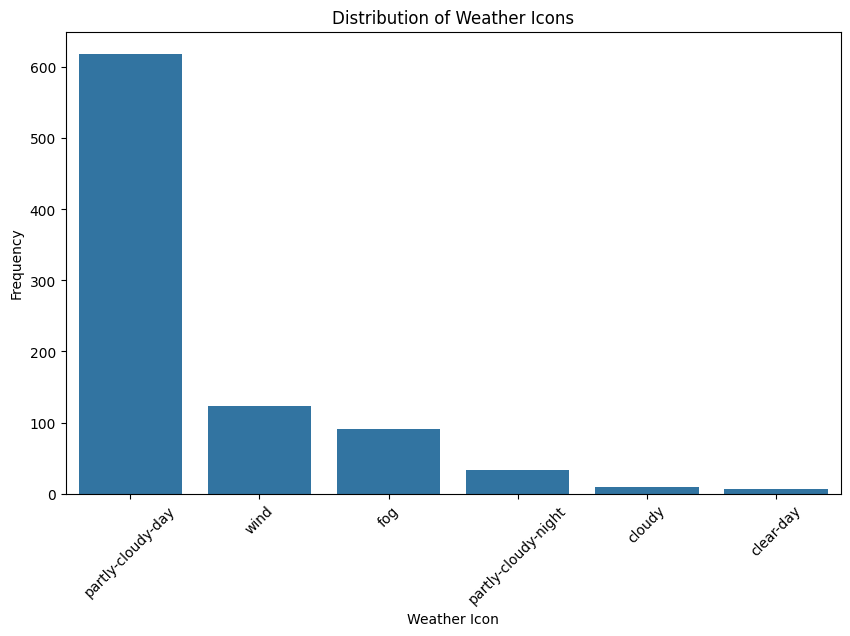

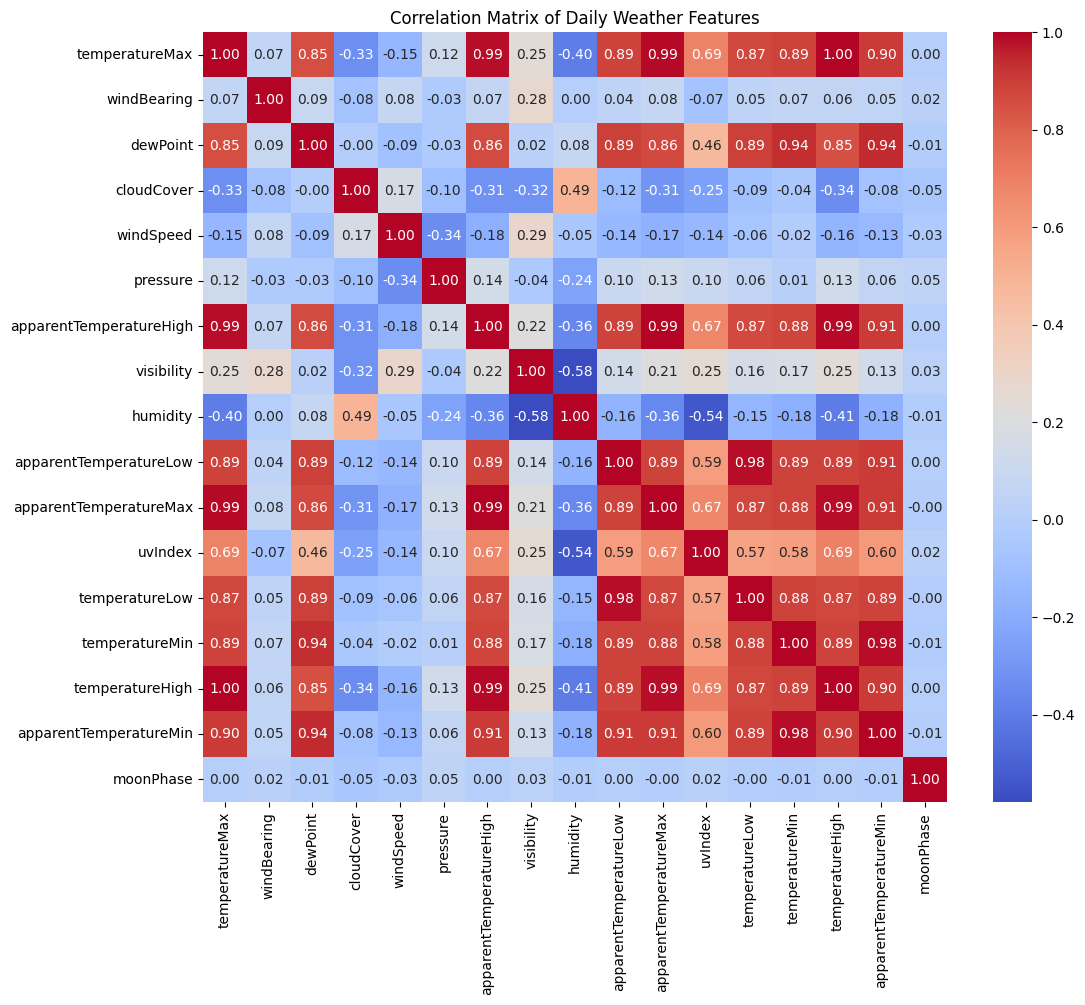

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Convert weather_daily_darksky_df to Pandas DataFrame for visualization and modeling
weather_daily_pd = weather_daily_darksky_df.toPandas()

# --- Model 1: Clustering based on daily weather features ---

# Prepare data for clustering
features = ['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
            'apparentTemperatureHigh', 'visibility', 'humidity', 'apparentTemperatureLow',
            'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
            'apparentTemperatureMin', 'moonPhase']
X = weather_daily_pd[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Determine the optimal number of clusters (using the elbow method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled_imputed)  # Use the imputed data here
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
print("\n")

# Apply K-means clustering (using the optimal k)
optimal_k = 3  # Example: based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
weather_daily_pd['cluster'] = kmeans.fit_predict(X_scaled_imputed)  # Use the imputed data here

# Visualize the clusters (using a scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperatureMax', y='humidity', hue='cluster', data=weather_daily_pd, palette='viridis')
plt.title('K-means Clustering of Daily Weather Data')
plt.xlabel('Maximum Temperature')
plt.ylabel('Humidity')
plt.show()
print("\n")

# --- Model 2: Time series analysis of temperature ---

# Convert 'time' to datetime format and set as index
weather_daily_pd['time'] = pd.to_datetime(weather_daily_pd['time'])
weather_daily_pd = weather_daily_pd.set_index('time')

# --- Visualization 1: Distribution of 'icon' categories ---

# Plot the frequency of each 'icon' category
plt.figure(figsize=(10, 6))
sns.countplot(x='icon', data=weather_daily_pd, order=weather_daily_pd['icon'].value_counts().index)
plt.title('Distribution of Weather Icons')
plt.xlabel('Weather Icon')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
print("\n")

# --- Visualization 2: Correlation matrix of weather features ---

# Calculate the correlation matrix
corr_matrix = weather_daily_pd[features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Weather Features')
plt.show()
print("\n")

Model LR:

Mean Squared Error: 0.06066950918870829
R-squared: 0.998224640774852




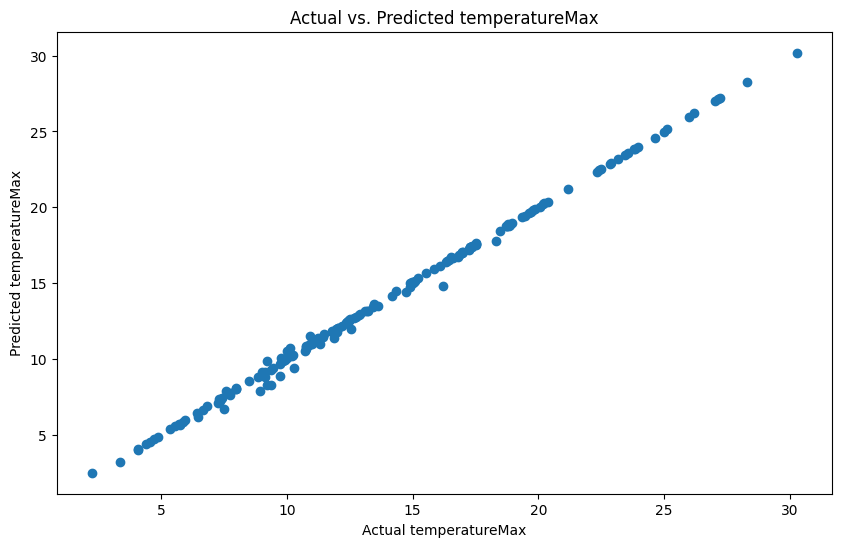

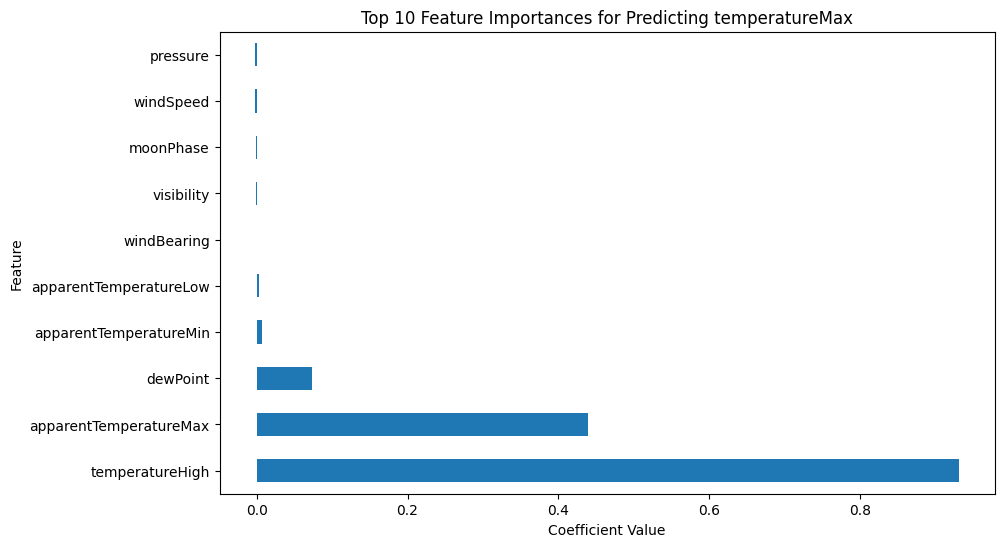

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Convert weather_daily_darksky_df to Pandas DataFrame for visualization and modeling
weather_daily_pd = weather_daily_darksky_df.toPandas()

# --- Model: Predicting temperatureMax using Linear Regression ---

# Prepare data for the model
features = ['windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
            'apparentTemperatureHigh', 'visibility', 'humidity', 'apparentTemperatureLow',
            'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
            'apparentTemperatureMin', 'moonPhase']
X = weather_daily_pd[features]
y = weather_daily_pd['temperatureMax']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\n")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual temperatureMax")
plt.ylabel("Predicted temperatureMax")
plt.title("Actual vs. Predicted temperatureMax")
plt.show()
print("\n")

# --- Visualization: Feature importance ---

# Get feature importances (coefficients) from the model
feature_importances = pd.Series(model.coef_, index=features)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Predicting temperatureMax')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Model: Predicting temperatureMax using Linear Regression:

- Prepares the data by selecting relevant features and splitting it into training and testing sets.

- Imputes missing values using SimpleImputer to handle missing data.

- Trains a Linear Regression model to predict temperatureMax based on the other features.

- Evaluates the model's performance using Mean Squared Error (MSE) and R-squared.

- Visualizes the actual vs. predicted temperatureMax values using a scatter plot.

Model Random Forest:

Mean Squared Error: 0.12384753225988712
R-squared: 0.9963758754298555




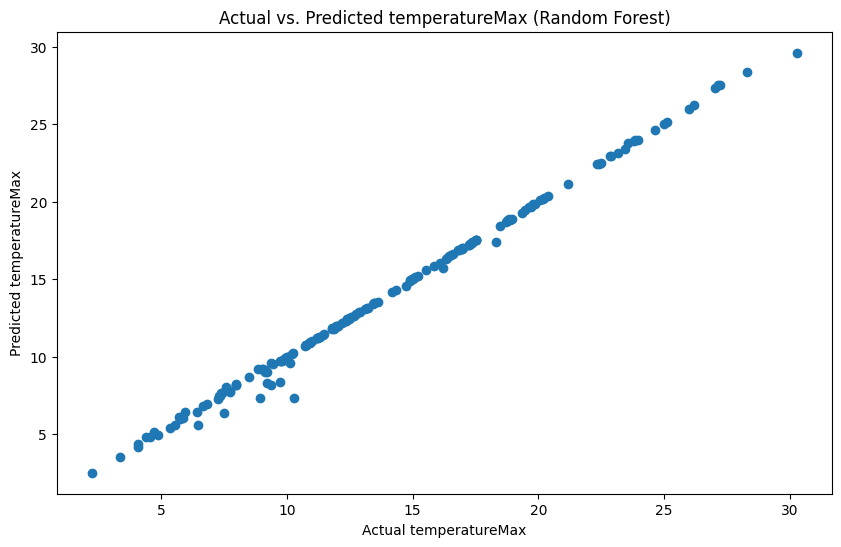

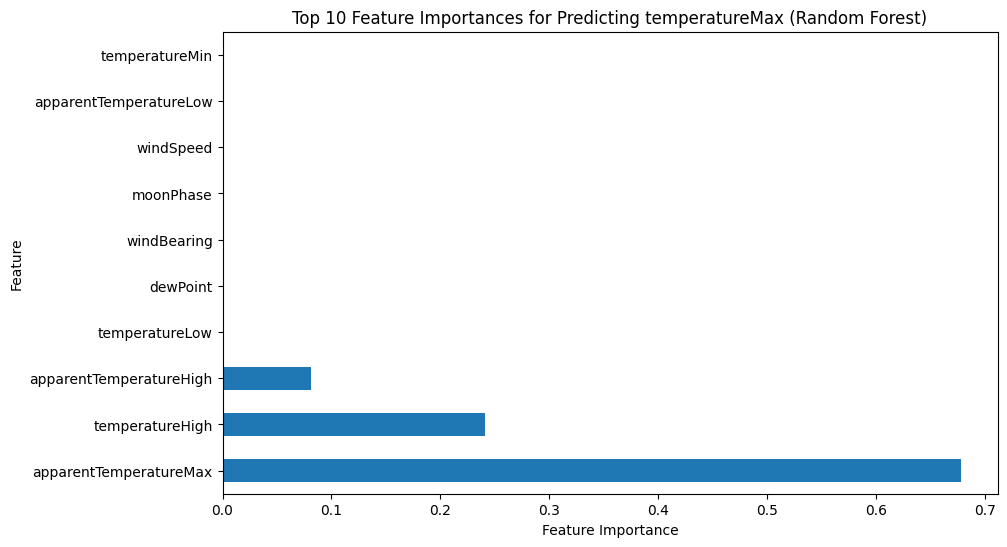

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Convert weather_daily_darksky_df to Pandas DataFrame for visualization and modeling
weather_daily_pd = weather_daily_darksky_df.toPandas()

# --- Model: Predicting temperatureMax using Random Forest ---

# Prepare data for the model
features = ['windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
            'apparentTemperatureHigh', 'visibility', 'humidity', 'apparentTemperatureLow',
            'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
            'apparentTemperatureMin', 'moonPhase']
X = weather_daily_pd[features]
y = weather_daily_pd['temperatureMax']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\n")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual temperatureMax")
plt.ylabel("Predicted temperatureMax")
plt.title("Actual vs. Predicted temperatureMax (Random Forest)")
plt.show()
print("\n")

# --- Visualization: Feature importance ---

# Get feature importances from the model
feature_importances = pd.Series(model.feature_importances_, index=features)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Predicting temperatureMax (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Model Extreme Gradient Boost Regressor:

Mean Squared Error: 0.09966723274440678
R-squared: 0.9970834585038857




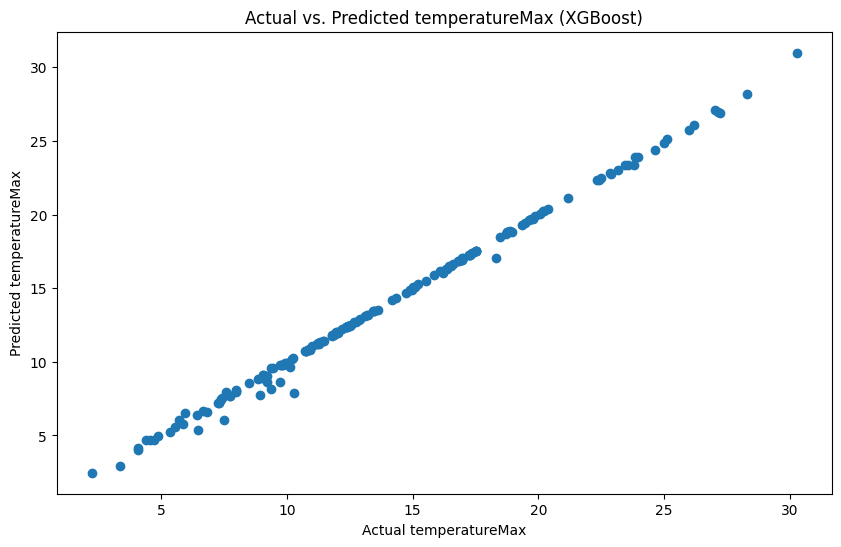

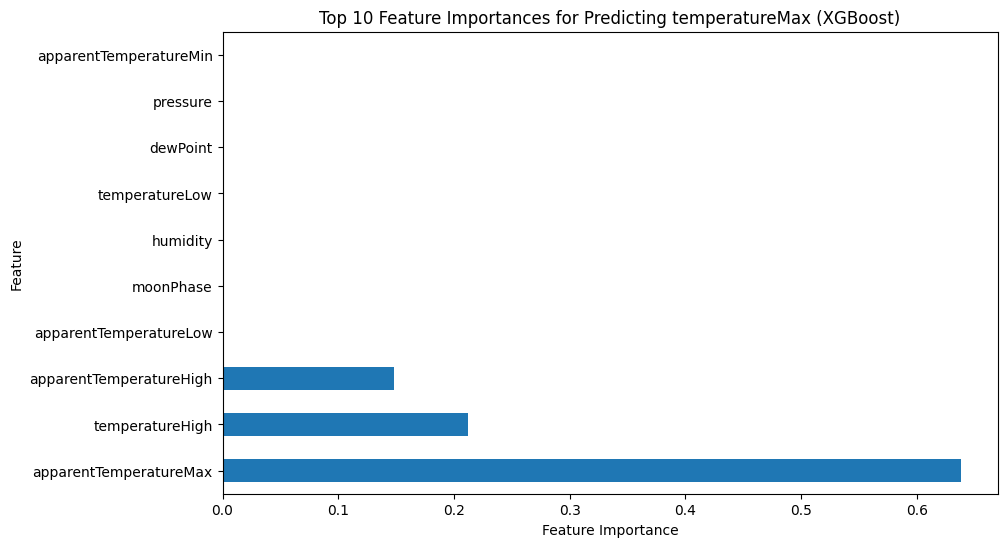

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

# Convert weather_daily_darksky_df to Pandas DataFrame for visualization and modeling
weather_daily_pd = weather_daily_darksky_df.toPandas()

# --- Model: Predicting temperatureMax using XGBoost ---

# Prepare data for the model
features = ['windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
            'apparentTemperatureHigh', 'visibility', 'humidity', 'apparentTemperatureLow',
            'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
            'apparentTemperatureMin', 'moonPhase']
X = weather_daily_pd[features]
y = weather_daily_pd['temperatureMax']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the XGBoost model
model = XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)  # You can adjust hyperparameters
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("\n")

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual temperatureMax")
plt.ylabel("Predicted temperatureMax")
plt.title("Actual vs. Predicted temperatureMax (XGBoost)")
plt.show()
print("\n")

# --- Visualization: Feature importance ---

# Get feature importances from the model
feature_importances = pd.Series(model.feature_importances_, index=features)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Predicting temperatureMax (XGBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Step 14] Visualizing 'acorn_details__df':

The code performs Principal Component Analysis (PCA) on the acorn_details_df data to reduce its dimensionality and visualize the relationships between different Acorn categories.

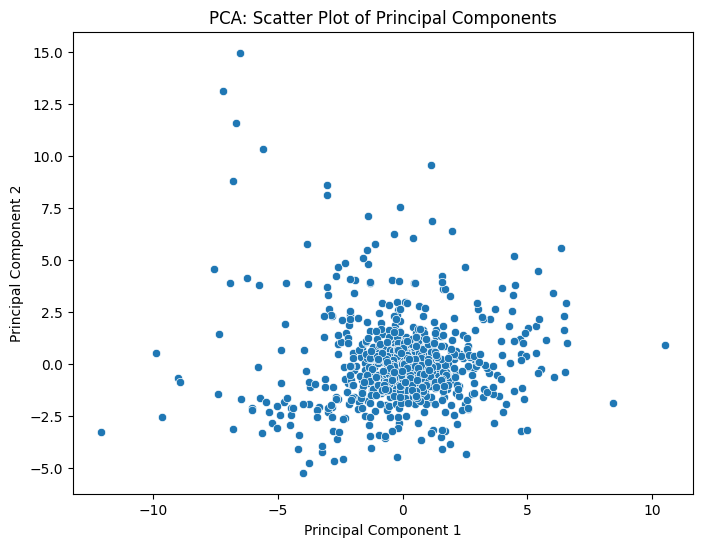

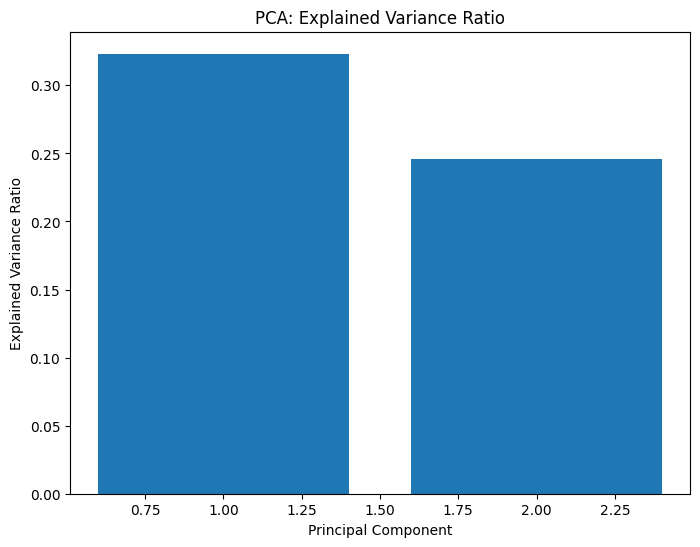

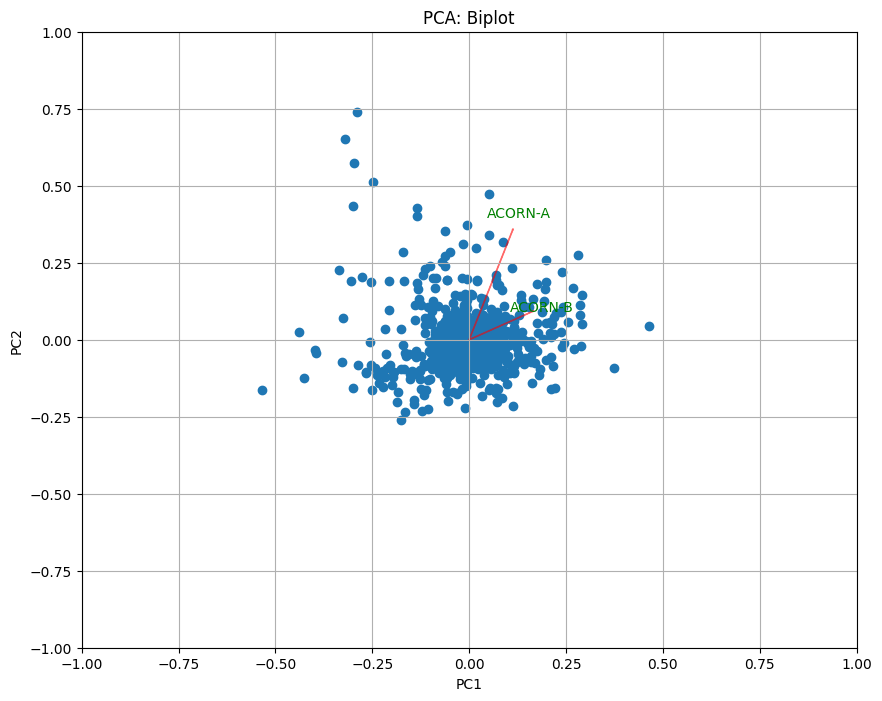

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Convert acorn_details_df to Pandas DataFrame for visualization and modeling
acorn_details_pd = acorn_details_df.toPandas()

# --- Model: Principal Component Analysis (PCA) for dimensionality reduction ---

# Prepare data for PCA
features = ['ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D', 'ACORN-E', 'ACORN-F',
            'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J', 'ACORN-K', 'ACORN-L',
            'ACORN-M', 'ACORN-N', 'ACORN-O', 'ACORN-P', 'ACORN-Q']
X = acorn_details_pd[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# --- Visualization 1: Scatter plot of principal components ---

# Plot the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA: Scatter Plot of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print("\n")

# --- Visualization 2: Explained variance ratio ---

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('PCA: Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
print("\n")

# --- Visualization 3: Biplot (combining scatter plot and loadings) ---

# Create a biplot (combining scatter plot and loadings)
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Plot the biplot
plt.figure(figsize=(10, 8))
biplot(principal_components, pca.components_, labels=features)
plt.title('PCA: Biplot')
plt.show()

- Scatter plot of principal components: Shows the distribution of data points in the reduced-dimensional space.

- Explained variance ratio: Shows how much variance is explained by each principal component.

- Biplot: Combines the scatter plot with loadings (correlations between original features and principal components), providing insights into how the original features contribute to the principal components.

Model: t-SNE for Cimensionality Reduction and Visualization:

This code performs t-distributed Stochastic Neighbor Embedding (t-SNE) on the acorn_details_df data to reduce its dimensionality and visualize the relationships between different Acorn categories in a 2D space. It includes data preprocessing and a scatter plot of the resulting t-SNE embeddings.

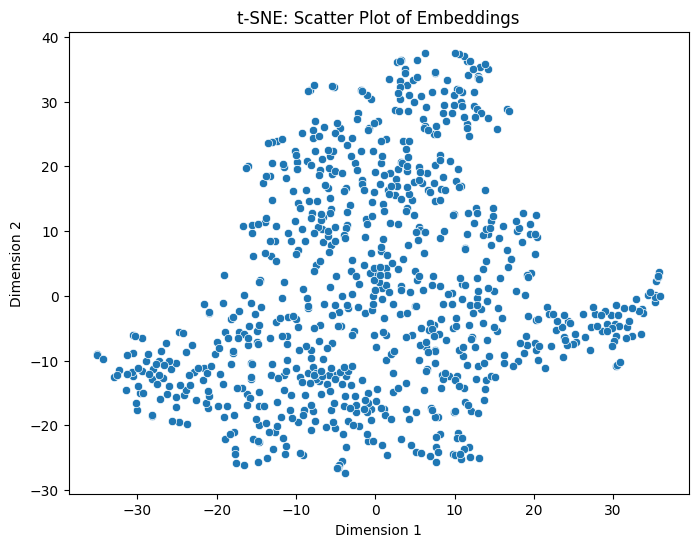

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

# Convert acorn_details_df to Pandas DataFrame for visualization and modeling
acorn_details_pd = acorn_details_df.toPandas()

# --- Model: t-SNE for dimensionality reduction and visualization ---

# Prepare data for t-SNE
features = ['ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D', 'ACORN-E', 'ACORN-F',
            'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J', 'ACORN-K', 'ACORN-L',
            'ACORN-M', 'ACORN-N', 'ACORN-O', 'ACORN-P', 'ACORN-Q']
X = acorn_details_pd[features]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
embeddings = tsne.fit_transform(X)
tsne_df = pd.DataFrame(data=embeddings, columns=['Dimension 1', 'Dimension 2'])

# --- Visualization: Scatter plot of t-SNE embeddings ---

# Plot the t-SNE embeddings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=tsne_df)
plt.title('t-SNE: Scatter Plot of Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Step 15] Visualizing Final for 'Household Energy Insights with Big Data Analytics for Climate Change Mitigation':

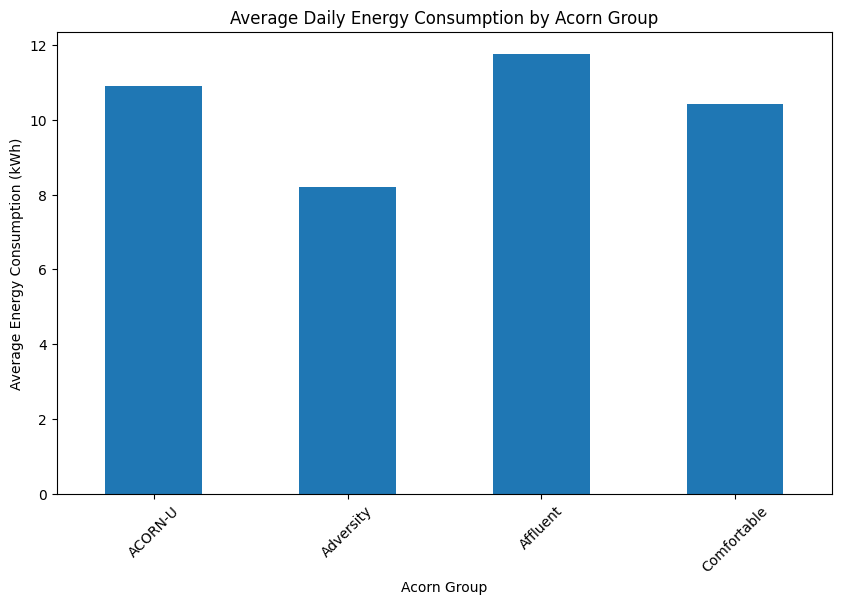

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Visualization 1: Energy Consumption Patterns by Acorn Group ---

# Merge households_pd and daily_pd on 'LCLid'
merged_df = pd.merge(households_pd, daily_pd, on='LCLid')

# Calculate average daily energy consumption for each Acorn group
avg_energy_consumption = merged_df.groupby('Acorn_grouped')['energy_sum'].mean()

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
avg_energy_consumption.plot(kind='bar')
plt.title('Average Daily Energy Consumption by Acorn Group')
plt.xlabel('Acorn Group')
plt.ylabel('Average Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.show()

Visualization 1: Energy Consumption Patterns by Acorn Group

- Data: Combine households_df and daily_df (or hhblock_df for hourly data).

- Visualization: Grouped bar chart showing average daily (or hourly) energy consumption for each Acorn group.

- Analysis: Compare energy usage patterns across different socioeconomic groups. Identify groups with higher or lower consumption and potential factors contributing to these differences.

- Interpretation: This visualization highlights the link between socioeconomic factors and energy consumption, providing insights for targeted interventions and policies.

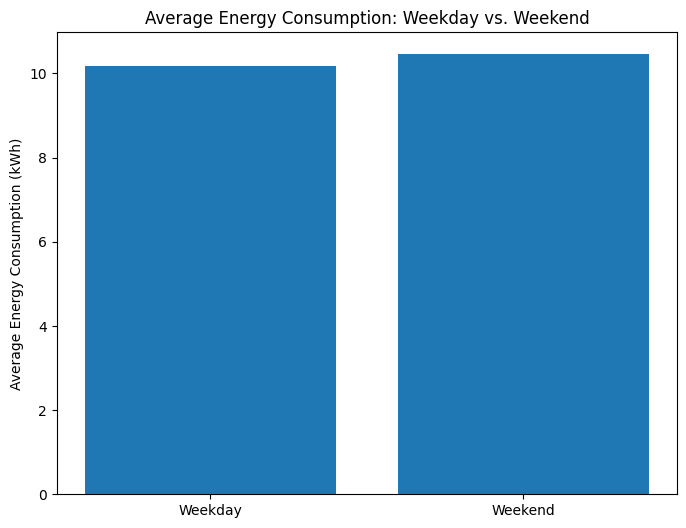

In [98]:
# --- Visualization 2: Energy Consumption on Weekdays vs. Weekends ---

# Convert 'day' to datetime and extract day of the week
daily_pd['day'] = pd.to_datetime(daily_pd['day'], format='%d-%m-%Y')
daily_pd['day_of_week'] = daily_pd['day'].dt.day_name()

# Calculate average energy consumption for weekdays and weekends
weekday_avg = daily_pd[daily_pd['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['energy_sum'].mean()
weekend_avg = daily_pd[daily_pd['day_of_week'].isin(['Saturday', 'Sunday'])]['energy_sum'].mean()

# Plot the grouped bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Weekday', 'Weekend'], [weekday_avg, weekend_avg])
plt.title('Average Energy Consumption: Weekday vs. Weekend')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

Visualization 2: Energy Consumption on Weekdays vs. Weekends

- Data: Use daily_df or hhblock_df.

- Visualization: Grouped bar chart comparing average energy consumption on weekdays vs. weekends.

- Analysis: Identify differences in energy usage patterns between weekdays and weekends. Explore potential causes, such as occupancy variations or changes in appliance usage.

- Interpretation: This visualization reveals behavioral patterns in energy consumption, offering opportunities for promoting energy conservation during peak usage periods.

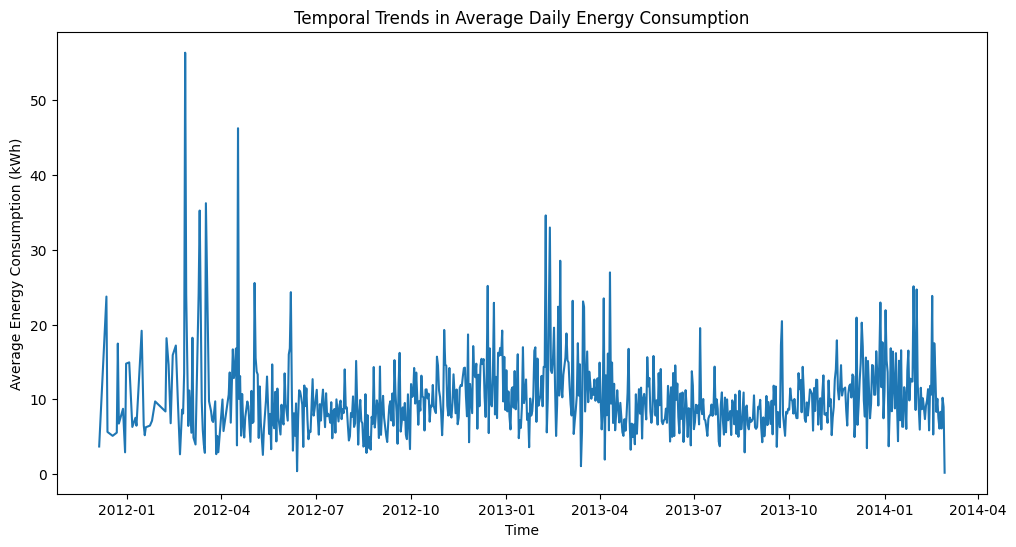

In [105]:
import matplotlib.pyplot as plt

# Calculate daily average energy consumption
daily_avg_consumption = daily_pd.groupby('day')['energy_sum'].mean()

# Plot the time series of daily average energy consumption
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_consumption.index, daily_avg_consumption.values)
plt.title('Temporal Trends in Average Daily Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

Visualization 3: Temporal Trends in Energy Consumption

- Data: Use daily_df or halfhourly_df.

- Visualization: Time series plot showing overall energy consumption trends over the entire dataset period.

- Analysis: Identify long-term trends, seasonal patterns, or anomalies in energy consumption. Explore potential factors influencing these trends, such as economic conditions, policy changes, or technological advancements.

- Interpretation: This visualization provides a comprehensive view of energy consumption patterns over time, highlighting the need for sustainable energy solutions and the impact of various factors on energy demand.

Visualization 4
:  Energy Consumption Variability Across Households

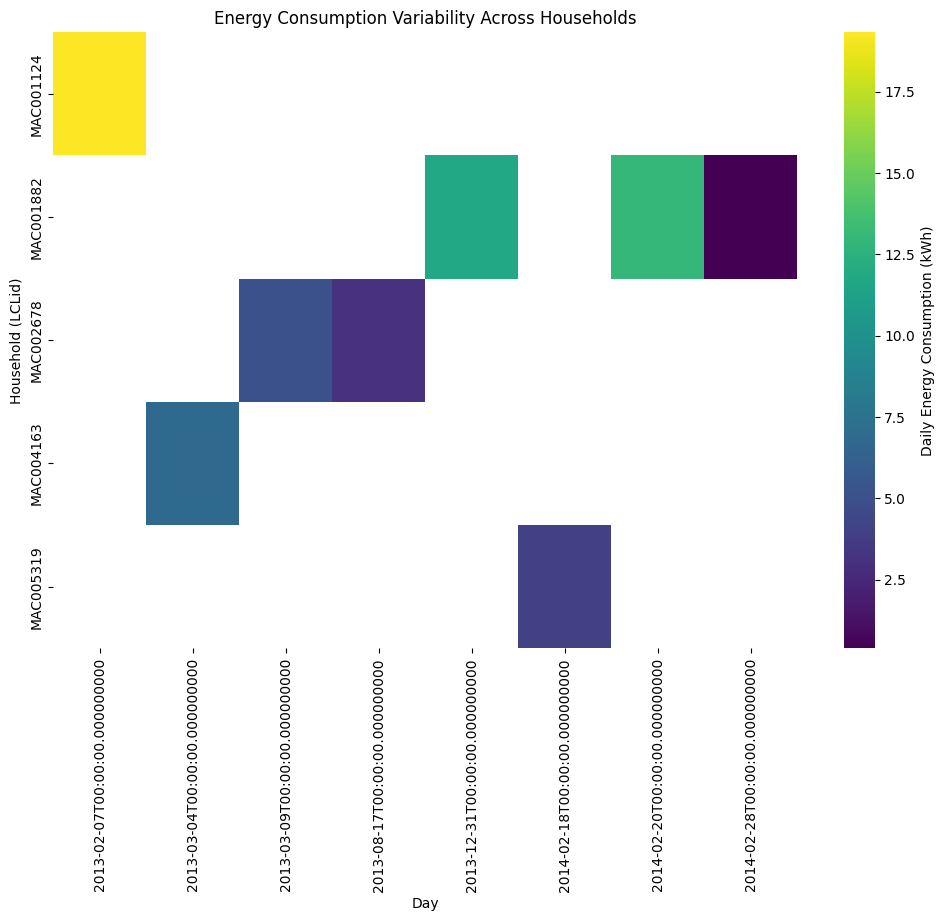

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample a subset of households for clearer visualization
sample_households = households_pd['LCLid'].sample(20)
sample_daily_pd = daily_pd[daily_pd['LCLid'].isin(sample_households)]

# Create a pivot table for the heatmap
heatmap_data = sample_daily_pd.pivot(index='LCLid', columns='day', values='energy_sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Daily Energy Consumption (kWh)'})
plt.title('Energy Consumption Variability Across Households')
plt.xlabel('Day')
plt.ylabel('Household (LCLid)')
plt.show()

Interpretation

- Household Differences: There's significant variation in energy consumption between different households. Some households consistently use more energy (brighter colors), while others use less (darker colors). This highlights the individual nature of energy usage patterns.

- Temporal Variations: Some households show changes in their energy consumption over time. For example, a household might have periods of higher energy use followed by periods of lower use. This could be due to seasonal changes, occupancy variations, or changes in appliance usage.

- Outliers: Certain households have days with unusually high or low energy consumption (extreme colors). These outliers could indicate specific events or behavioral changes affecting energy usage.

- Missing Data: Some households have missing data for certain days (white spaces in the heatmap). This could be due to data collection issues or periods where the household was unoccupied.

Visualization 5:  Energy Consumption Distribution by Hour of Day and Acorn Group

This visualization will combine temporal and demographic insights to show how energy consumption patterns vary throughout the day across different Acorn groups.

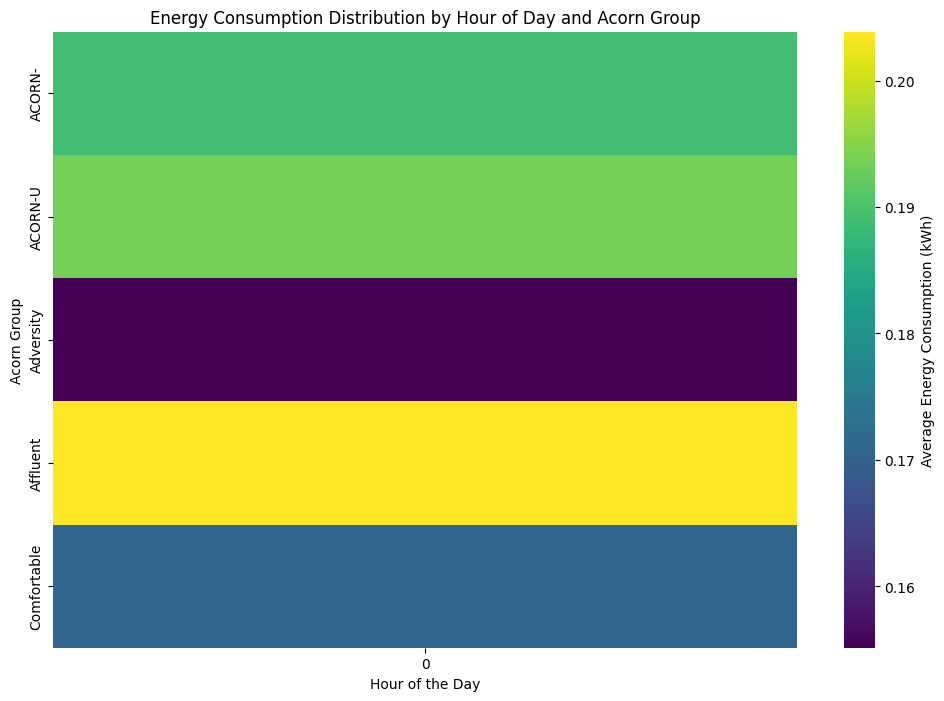

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merge households_pd and hhblock_pd on 'LCLid'
merged_df = pd.merge(households_pd, hhblock_pd, on='LCLid')

# Create a pivot table with Acorn_grouped as index, hour as columns, and hh_0 as values
pivot_table = merged_df.pivot_table(index='Acorn_grouped', columns='hour', values='hh_0')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': 'Average Energy Consumption (kWh)'})
plt.title('Energy Consumption Distribution by Hour of Day and Acorn Group')
plt.xlabel('Hour of the Day')
plt.ylabel('Acorn Group')
plt.show()

Interpretation

- Consistent Usage: Energy consumption appears relatively consistent across all hours for each Acorn group. There aren't drastic peaks or dips within a specific group.

- Group Differences: The "Adversity" group shows the highest energy consumption overall (brightest colors), while the "Comfortable" group has the lowest (darkest colors). This suggests a potential correlation between socioeconomic factors and energy usage.

- Subtle Hourly Variations: Although subtle, there might be slightly higher consumption during evening hours (around 17:00-20:00) across most groups, potentially reflecting typical household activity patterns.

Explanations

- Appliance Usage: The "Adversity" group might have less energy-efficient appliances or rely more on energy-intensive heating/cooling systems.

- Occupancy: Household occupancy patterns could contribute to the differences. Perhaps the "Adversity" group has more people at home during the day, leading to higher overall consumption.

- Behavioral Factors: Energy-saving habits and awareness could vary across Acorn groups, influencing overall consumption levels.